# Telecom Churn Case Study - Kaggle

#### Created By: Abhishek Dixit and Abhishek Das

**Link:** https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c-66/overview

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of **15-25% annual churn rate**. Given the fact that it costs **5-10 times more to acquire a new customer than to retain an existing one**, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

---

### **Customer Behaviour During Churn**

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle:

1. <u> **The 'good' phase:** </u> 
   In this phase, the customer is happy with the service and behaves as usual.

2. <u>**The 'action' phase:** </u> 
   The customer experience starts to sour in this phase. For example, they may:  
   - Receive a compelling offer from a competitor  
   - Face unjust charges  
   - Become unhappy with service quality  

   In this phase, the customer usually shows different behaviour than the 'good' months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (e.g., matching the competitor's offer or improving the service quality).

3. <u>**The 'churn' phase:** </u>  
   In this phase, the customer is said to have churned. In this case, since you are working over a four-month window:
   - The first two months are the 'good' phase
   - The third month is the 'action' phase
   - The fourth month (September) is the 'churn' phase.



# 1. Data Import and Understanding


In [863]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn import metrics
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [864]:
# Set environment settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [865]:
# Reading the dataset

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print("Dimension of the training dataset is", train.shape)
print("Dimension of the unseen dataset is", test.shape)
print("Dimension of the sample dataset is", sample.shape)
print("Dimension of the data dictionary is", data_dict.shape)

Dimension of the training dataset is (69999, 172)
Dimension of the unseen dataset is (30000, 171)
Dimension of the sample dataset is (30000, 2)
Dimension of the data dictionary is (36, 2)


In [866]:
# Inspecting the data dictionary
data_dict

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

In [867]:
# Inspecting the train dataset
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [868]:
# Inspecting the test dataset
test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [869]:
# statistics summary of training set
train.describe().T

count          mean           std       min         25%  \
id                  69999.0  34999.000000  20207.115084     0.000  17499.5000   
circle_id           69999.0    109.000000      0.000000   109.000    109.0000   
loc_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
std_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
loc_ic_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
arpu_6              69999.0    283.134365    334.213918 -2258.709     93.5810   
arpu_7              69999.0    278.185912    344.366927 -1289.715     86.7140   
arpu_8              69999.0    278.858826    351.924315  -945.808     84.0950   
onnet_mou_6         67231.0    133.153275    299.963093     0.000      7.4100   
onnet_mou_7         67312.0    133.894438    311.277193     0.000      6.6750   
onnet_mou_8         66296.0    132.978257    311.896596     0.000      6.4100   
offnet_mou_6        67231.0    198.874771    316.818355     0.000     34.8600   
offnet_mou_7        67312.0    197.153383    322.482226     0.000     32.2400   
offnet_mou_8        66296.0    196.543577    324.089234     0.000     31.5750   
roam_ic_mou_6       67231.0      9.765435     57.374429     0.000      0.0000   
roam_ic_mou_7       67312.0      7.014568     55.960985     0.000      0.0000   
roam_ic_mou_8       66296.0      7.004892     53.408135     0.000      0.0000   
roam_og_mou_6       67231.0     14.186457     73.469261     0.000      0.0000   
roam_og_mou_7       67312.0      9.842191     58.511894     0.000      0.0000   
roam_og_mou_8       66296.0      9.771783     64.618388     0.000      0.0000   
loc_og_t2t_mou_6    67231.0     46.904854    150.971758     0.000      1.6600   
loc_og_t2t_mou_7    67312.0     46.166503    154.739002     0.000      1.6500   
loc_og_t2t_mou_8    66296.0     45.686109    153.716880     0.000      1.6100   
loc_og_t2m_mou_6    67231.0     93.238231    162.046699     0.000      9.9200   
loc_og_t2m_mou_7    67312.0     90.799240    153.852597     0.000     10.0900   
loc_og_t2m_mou_8    66296.0     91.121447    152.997805     0.000      9.8300   
loc_og_t2f_mou_6    67231.0      3.743179     13.319542     0.000      0.0000   
loc_og_t2f_mou_7    67312.0      3.777031     13.568110     0.000      0.0000   
loc_og_t2f_mou_8    66296.0      3.661652     13.009193     0.000      0.0000   
loc_og_t2c_mou_6    67231.0      1.126025      5.741811     0.000      0.0000   
loc_og_t2c_mou_7    67312.0      1.361052      7.914113     0.000      0.0000   
loc_og_t2c_mou_8    66296.0      1.420840      6.542202     0.000      0.0000   
loc_og_mou_6        67231.0    143.893585    252.034597     0.000     17.2350   
loc_og_mou_7        67312.0    140.750120    246.313148     0.000     17.5900   
loc_og_mou_8        66296.0    140.476486    245.342359     0.000     17.2375   
std_og_t2t_mou_6    67231.0     80.619382    255.098355     0.000      0.0000   
std_og_t2t_mou_7    67312.0     83.775851    266.693254     0.000      0.0000   
std_og_t2t_mou_8    66296.0     83.471486    267.021929     0.000      0.0000   
std_og_t2m_mou_6    67231.0     88.152110    255.771554     0.000      0.0000   
std_og_t2m_mou_7    67312.0     91.538615    267.532089     0.000      0.0000   
std_og_t2m_mou_8    66296.0     90.586999    270.032002     0.000      0.0000   
std_og_t2f_mou_6    67231.0      1.126377      8.136645     0.000      0.0000   
std_og_t2f_mou_7    67312.0      1.084062      8.325206     0.000      0.0000   
std_og_t2f_mou_8    66296.0      1.057739      7.696853     0.000      0.0000   
std_og_t2c_mou_6    67231.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_7    67312.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_8    66296.0      0.000000      0.000000     0.000      0.0000   
std_og_mou_6        67231.0    169.900601    392.046600     0.000      0.0000   
std_og_mou_7        67312.0    176.401217    409.2995

In [870]:
# statistics summary of test set
test.describe().T

count          mean          std        min  \
id                  30000.0  84998.500000  8660.398374  69999.000   
circle_id           30000.0    109.000000     0.000000    109.000   
loc_og_t2o_mou      29684.0      0.000000     0.000000      0.000   
std_og_t2o_mou      29684.0      0.000000     0.000000      0.000   
loc_ic_t2o_mou      29684.0      0.000000     0.000000      0.000   
arpu_6              30000.0    282.644348   314.560212   -185.043   
arpu_7              30000.0    279.355021   323.205370  -2014.045   
arpu_8              30000.0    279.845167   326.437029   -146.859   
onnet_mou_6         28831.0    130.629693   290.677420      0.000   
onnet_mou_7         28828.0    133.148632   302.921820      0.000   
onnet_mou_8         28325.0    133.111348   301.951806      0.000   
offnet_mou_6        28831.0    195.745473   316.923836      0.000   
offnet_mou_7        28828.0    196.792375   333.628481      0.000   
offnet_mou_8        28325.0    196.647889   334.277643      0.000   
roam_ic_mou_6       28831.0     10.380431    99.973352      0.000   
roam_ic_mou_7       28828.0      7.465889   103.337675      0.000   
roam_ic_mou_8       28325.0      7.967267    94.622596      0.000   
roam_og_mou_6       28831.0     13.269785    66.475975      0.000   
roam_og_mou_7       28828.0      9.763957    58.325466      0.000   
roam_og_mou_8       28325.0     10.440251    64.933372      0.000   
loc_og_t2t_mou_6    28831.0     47.557601   150.588656      0.000   
loc_og_t2t_mou_7    28828.0     47.188688   156.664295      0.000   
loc_og_t2t_mou_8    28325.0     46.359887   145.087354      0.000   
loc_og_t2m_mou_6    28831.0     93.584273   164.481651      0.000   
loc_og_t2m_mou_7    28828.0     92.793180   165.674188      0.000   
loc_og_t2m_mou_8    28325.0     93.238288   164.516683      0.000   
loc_og_t2f_mou_6    28831.0      3.769281    16.156500      0.000   
loc_og_t2f_mou_7    28828.0      3.830238    15.772920      0.000   
loc_og_t2f_mou_8    28325.0      3.716231    13.864608      0.000   
loc_og_t2c_mou_6    28831.0      1.116132     4.695667      0.000   
loc_og_t2c_mou_7    28828.0      1.385891     6.559241      0.000   
loc_og_t2c_mou_8    28325.0      1.464202     7.316747      0.000   
loc_og_mou_6        28831.0    144.918443   251.092969      0.000   
loc_og_mou_7        28828.0    143.819463   254.278712      0.000   
loc_og_mou_8        28325.0    143.321709   247.240694      0.000   
std_og_t2t_mou_6    28831.0     77.988809   246.248819      0.000   
std_og_t2t_mou_7    28828.0     82.187570   256.339646      0.000   
std_og_t2t_mou_8    28325.0     82.840749   261.860321      0.000   
std_og_t2m_mou_6    28831.0     85.311712   255.252441      0.000   
std_og_t2m_mou_7    28828.0     89.089166   273.537846      0.000   
std_og_t2m_mou_8    28325.0     88.086236   275.751699      0.000   
std_og_t2f_mou_6    28831.0      1.135152     7.619692      0.000   
std_og_t2f_mou_7    28828.0      1.187272     9.207658      0.000   
std_og_t2f_mou_8    28325.0      1.091321     8.375128      0.000   
std_og_t2c_mou_6    28831.0      0.000000     0.000000      0.000   
std_og_t2c_mou_7    28828.0      0.000000     0.000000      0.000   
std_og_t2c_mou_8    28325.0      0.000000     0.000000      0.000   
std_og_mou_6        28831.0    164.438342   384.991155      0.000   
std_og_mou_7        28828.0    172.466703   408.036124      0.000   
std_og_mou_8        28325.0    172.020983   413.814560      0.000   
isd_og_mou_6        28831.0      0.687545    12.179579      0.000   
isd_og_mou_7        28828.0      0.695952    13.874719      0.000   
isd_og_mou_8        28325.0      0.673280    11.582123      0.000   
spl_og_mou_6        28831.0      3.819317    12.536781      0.000   
spl_og_mou_7        28828.0      4.981770    16.427132      0.000   
spl_og_mou_8        28325.0      5.074228    18.193925      0.000   
og_others_6         28831.0      0.434514     1.922616      0.000   
og_others_7         

**For arpu,arpu,arpu min value is neagative which is not possible,so we will handle them after missing value imputation**

In [871]:
# Creating the copy of the original training set
telecom_train = train.copy()
# Creating the copy of the original test set
telecom_test = test.copy()

In [872]:
# Creating the copy of the original test set
telecom_test_df = test.copy()

In [873]:
train.shape

(69999, 172)

In [874]:
test.shape

(30000, 171)

# 2. Data Cleaning and Preparation

## Checking null values

In [875]:
def avg_missing_values(df):
    nv_train_set = round(df.isnull().mean()[df.isnull().mean() > 0.0] * 100, 2)
    return nv_train_set
    
    

In [876]:
# checking only those columns which has avg null values greater than 0 %
avg_missing_values(train)

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

**we have lots of columns with missing values so we will treat them accordingly**

**first of all we will treat specific services ('night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8')  are used or not it can be 1 or 0 so where it is null we will impute it with 0**

In [877]:
services_list = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
for service in services_list:
    print(train[service].value_counts())
    print()

night_pck_user_6
0.0    17124
1.0      444
Name: count, dtype: int64

night_pck_user_7
0.0    17435
1.0      430
Name: count, dtype: int64

night_pck_user_8
0.0    18030
1.0      387
Name: count, dtype: int64

fb_user_6
1.0    16098
0.0     1470
Name: count, dtype: int64

fb_user_7
1.0    16249
0.0     1616
Name: count, dtype: int64

fb_user_8
1.0    16397
0.0     2020
Name: count, dtype: int64



## Imputing missing Values

In [878]:
for service in services_list:
    train[service] = train[service].fillna(0)
# check again missing values    
avg_missing_values(train)    
    

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

In [879]:
# 
combined_missing_dict = {
    '2g_6': ['arpu_2g_6','count_rech_2g_6'],
    '2g_7': ['arpu_2g_7','count_rech_2g_7'],
    '2g_8': ['arpu_2g_8','count_rech_2g_8'],
    '3g_6': ['arpu_3g_6','count_rech_3g_6'],
    '3g_7': ['arpu_3g_7','count_rech_3g_7'],
    '3g_8': ['arpu_3g_8','count_rech_3g_8'],
    # data recharge
    'rech_6': ['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6'],
    'rech_7': ['av_rech_amt_data_7','total_rech_data_7','max_rech_data_7'],
    'rech_8': ['av_rech_amt_data_8','total_rech_data_8','max_rech_data_8'],
}
# fill na value to 0 according to g_net_dict which represent arpu and count of recharge 
for col in combined_missing_dict.values():
    train.loc[train[col].isna().all(axis=1), col] = 0

# check again missing values    
avg_missing_values(train)

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

**we can not impute date value column so we will drop date value columns which has greater than 70% missing values**

In [880]:
train.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)
# check again missing values    
avg_missing_values(train)

loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
onnet_mou_6             3.95
onnet_mou_7             3.84
onnet_mou_8             5.29
offnet_mou_6            3.95
offnet_mou_7            3.84
offnet_mou_8            5.29
roam_ic_mou_6           3.95
roam_ic_mou_7           3.84
roam_ic_mou_8           5.29
roam_og_mou_6           3.95
roam_og_mou_7           3.84
roam_og_mou_8           5.29
loc_og_t2t_mou_6        3.95
loc_og_t2t_mou_7        3.84
loc_og_t2t_mou_8        5.29
loc_og_t2m_mou_6        3.95
loc_og_t2m_mou_7        3.84
loc_og_t2m_mou_8        5.29
loc_og_t2f_mou_6        3.95
loc_og_t2f_mou_7        3.84
loc_og_t2f_mou_8        5.29
loc_og_t2c_mou_6        3.95
loc_og_t2c_mou_7        3.84
loc_og_t2c_mou_8        5.29
loc_og_mou_6            3.95
loc_og_mou_7            3.84
loc_og_mou_8            5.29
std_og_t2t_mou_6        3.95
std_og_t2t_mou_7        3.84
std_og_t2t_mou

**As we have still missing values but for now it is under 10%, so we will drop them after removing single unique column treatment**

#### Let's check unique values in each columns

In [881]:
columns_with_single_value = train.nunique()[train.nunique() == 1].index.tolist()
columns_with_single_value

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [882]:
for col in columns_with_single_value:
    print(f"Value counts for column '{col}':")
    print(train[col].value_counts())
    print()

Value counts for column 'circle_id':
circle_id
109    69999
Name: count, dtype: int64

Value counts for column 'loc_og_t2o_mou':
loc_og_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'std_og_t2o_mou':
std_og_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'loc_ic_t2o_mou':
loc_ic_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'last_date_of_month_6':
last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64

Value counts for column 'last_date_of_month_7':
last_date_of_month_7
7/31/2014    69600
Name: count, dtype: int64

Value counts for column 'last_date_of_month_8':
last_date_of_month_8
8/31/2014    69266
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_6':
std_og_t2c_mou_6
0.0    67231
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_7':
std_og_t2c_mou_7
0.0    67312
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_8':
std_og_t2c_mou_8
0.0    66296
N

**As we can see that there are multiple single columns which has values 0.0, so we will drop those columns**

In [883]:
train = train.drop(columns_with_single_value,axis=1)
train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [884]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 156 columns):
 #    Column               Dtype  
---   ------               -----  
 0    id                   int64  
 1    arpu_6               float64
 2    arpu_7               float64
 3    arpu_8               float64
 4    onnet_mou_6          float64
 5    onnet_mou_7          float64
 6    onnet_mou_8          float64
 7    offnet_mou_6         float64
 8    offnet_mou_7         float64
 9    offnet_mou_8         float64
 10   roam_ic_mou_6        float64
 11   roam_ic_mou_7        float64
 12   roam_ic_mou_8        float64
 13   roam_og_mou_6        float64
 14   roam_og_mou_7        float64
 15   roam_og_mou_8        float64
 16   loc_og_t2t_mou_6     float64
 17   loc_og_t2t_mou_7     float64
 18   loc_og_t2t_mou_8     float64
 19   loc_og_t2m_mou_6     float64
 20   loc_og_t2m_mou_7     float64
 21   loc_og_t2m_mou_8     float64
 22   loc_og_t2f_mou_6     float64
 23   loc_og_t2

In [885]:
# checking again % null values in entire data set
round(train.isnull().mean().mean() *100 ,2)

2.31

**still we have 2.18% null values Let's drop those rows whic has null values**

In [886]:
train = train.dropna(axis=0)
round(train.isnull().mean().mean() *100 ,2)

0.0

In [887]:
# check statics summary again
train.describe().T

count          mean           std      min         25%  \
id                  61895.0  35034.549350  20192.992366    0.000  17562.5000   
arpu_6              61895.0    293.583717    333.786791 -810.661    100.5330   
arpu_7              61895.0    296.110534    351.044889 -622.509    100.9265   
arpu_8              61895.0    297.141384    357.781341 -345.129    100.9715   
onnet_mou_6         61895.0    134.059224    300.571966    0.000      7.7900   
onnet_mou_7         61895.0    138.660389    316.534428    0.000      7.5900   
onnet_mou_8         61895.0    135.000000    314.679513    0.000      7.0400   
offnet_mou_6        61895.0    200.505383    316.567112    0.000     35.9000   
offnet_mou_7        61895.0    204.031269    327.195711    0.000     35.3350   
offnet_mou_8        61895.0    199.283881    323.126167    0.000     33.6200   
roam_ic_mou_6       61895.0      9.726454     55.946999    0.000      0.0000   
roam_ic_mou_7       61895.0      7.144846     56.634035    0.000      0.0000   
roam_ic_mou_8       61895.0      7.146508     54.289761    0.000      0.0000   
roam_og_mou_6       61895.0     14.034237     73.550373    0.000      0.0000   
roam_og_mou_7       61895.0      9.975275     59.865053    0.000      0.0000   
roam_og_mou_8       61895.0      9.913633     65.795591    0.000      0.0000   
loc_og_t2t_mou_6    61895.0     48.145673    153.247144    0.000      1.9100   
loc_og_t2t_mou_7    61895.0     48.507250    159.445793    0.000      2.1100   
loc_og_t2t_mou_8    61895.0     47.397539    157.589880    0.000      1.9300   
loc_og_t2m_mou_6    61895.0     95.335901    163.650317    0.000     10.8600   
loc_og_t2m_mou_7    61895.0     94.909252    156.452269    0.000     11.9950   
loc_og_t2m_mou_8    61895.0     94.314578    154.581969    0.000     11.2000   
loc_og_t2f_mou_6    61895.0      3.800591     13.494679    0.000      0.0000   
loc_og_t2f_mou_7    61895.0      3.898549     13.808711    0.000      0.0000   
loc_og_t2f_mou_8    61895.0      3.743625     13.177820    0.000      0.0000   
loc_og_t2c_mou_6    61895.0      1.140742      5.864227    0.000      0.0000   
loc_og_t2c_mou_7    61895.0      1.374079      8.081925    0.000      0.0000   
loc_og_t2c_mou_8    61895.0      1.419120      6.616200    0.000      0.0000   
loc_og_mou_6        61895.0    147.289594    255.242581    0.000     18.7400   
loc_og_mou_7        61895.0    147.322611    251.592238    0.000     20.7300   
loc_og_mou_8        61895.0    145.463164    249.156529    0.000     19.3800   
std_og_t2t_mou_6    61895.0     80.393881    254.984299    0.000      0.0000   
std_og_t2t_mou_7    61895.0     86.168354    270.477247    0.000      0.0000   
std_og_t2t_mou_8    61895.0     83.714672    268.057765    0.000      0.0000   
std_og_t2m_mou_6    61895.0     87.698473    254.556630    0.000      0.0000   
std_og_t2m_mou_7    61895.0     93.980331    272.254509    0.000      0.0000   
std_og_t2m_mou_8    61895.0     89.951245    268.576910    0.000      0.0000   
std_og_t2f_mou_6    61895.0      1.117867      8.051865    0.000      0.0000   
std_og_t2f_mou_7    61895.0      1.100545      8.480141    0.000      0.0000   
std_og_t2f_mou_8    61895.0      1.062159      7.746238    0.000      0.0000   
std_og_mou_6        61895.0    169.212956    390.969943    0.000      0.0000   
std_og_mou_7        61895.0    181.251965    415.723771    0.000      0.0000   
std_og_mou_8        61895.0    174.730701    410.319815    0.000      0.0000   
isd_og_mou_6        61895.0      0.788111     30.238388    0.000      0.0000   
isd_og_mou_7        61895.0      0.803830     30.216944    0.000      0.0000   
isd_og_mou_8        61895.0      0.823694     30.311775    0.000      0.0000   
spl_og_mou_6        61895.0      3.968736     16.097492    0.000      0.0000   
spl_og_mou_7        61895.0      5.095854     22.942930    0.000      0.0000   
spl_og_mou_8        61895.0      5.087951     18.033598    0.000      0.0000   
og_others_6         61

**Still we have negative min value,let's filter it out**

In [888]:
train.shape

(61895, 156)

In [889]:
# columns which has negative value
min_neagative = train.columns[train.columns.str.contains('arpu').tolist()]
min_neagative

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [890]:
# train set filter
train = train.loc[(train[min_neagative] >= 0).all(axis=1), :]
train.describe().T

count          mean           std    min          25%  \
id                  60146.0  35017.504755  20182.208894    0.0  17569.25000   
arpu_6              60146.0    294.351273    335.840605    0.0    100.42025   
arpu_7              60146.0    296.761646    353.000509    0.0    100.91325   
arpu_8              60146.0    297.354847    359.779189    0.0    100.52625   
onnet_mou_6         60146.0    135.785975    302.926407    0.0      8.18000   
onnet_mou_7         60146.0    140.344954    318.756950    0.0      7.96000   
onnet_mou_8         60146.0    136.416049    316.303907    0.0      7.38000   
offnet_mou_6        60146.0    202.547963    318.451272    0.0     37.04500   
offnet_mou_7        60146.0    206.028441    328.988698    0.0     36.41000   
offnet_mou_8        60146.0    200.989356    324.593490    0.0     34.49500   
roam_ic_mou_6       60146.0      9.839643     56.537881    0.0      0.00000   
roam_ic_mou_7       60146.0      7.108543     56.577271    0.0      0.00000   
roam_ic_mou_8       60146.0      7.079374     53.494233    0.0      0.00000   
roam_og_mou_6       60146.0     14.250206     74.410686    0.0      0.00000   
roam_og_mou_7       60146.0     10.022697     60.224121    0.0      0.00000   
roam_og_mou_8       60146.0      9.967803     66.346014    0.0      0.00000   
loc_og_t2t_mou_6    60146.0     48.328354    154.090534    0.0      2.03000   
loc_og_t2t_mou_7    60146.0     48.622190    160.058986    0.0      2.23000   
loc_og_t2t_mou_8    60146.0     47.496415    158.404369    0.0      2.01000   
loc_og_t2m_mou_6    60146.0     95.704616    163.757307    0.0     11.23000   
loc_og_t2m_mou_7    60146.0     95.309677    156.614548    0.0     12.38250   
loc_og_t2m_mou_8    60146.0     94.679773    154.806466    0.0     11.54000   
loc_og_t2f_mou_6    60146.0      3.794313     13.461643    0.0      0.00000   
loc_og_t2f_mou_7    60146.0      3.894466     13.740300    0.0      0.00000   
loc_og_t2f_mou_8    60146.0      3.741898     13.148723    0.0      0.00000   
loc_og_t2c_mou_6    60146.0      1.145649      5.906873    0.0      0.00000   
loc_og_t2c_mou_7    60146.0      1.380007      8.156328    0.0      0.00000   
loc_og_t2c_mou_8    60146.0      1.423457      6.630963    0.0      0.00000   
loc_og_mou_6        60146.0    147.834750    255.795521    0.0     19.41000   
loc_og_mou_7        60146.0    147.833921    251.912399    0.0     21.39500   
loc_og_mou_8        60146.0    145.925537    249.792767    0.0     19.98000   
std_og_t2t_mou_6    60146.0     81.843102    257.373622    0.0      0.00000   
std_og_t2t_mou_7    60146.0     87.708113    272.893986    0.0      0.00000   
std_og_t2t_mou_8    60146.0     84.985529    269.587374    0.0      0.00000   
std_og_t2m_mou_6    60146.0     89.210284    257.033005    0.0      0.00000   
std_og_t2m_mou_7    60146.0     95.528504    274.546034    0.0      0.00000   
std_og_t2m_mou_8    60146.0     91.243381    270.455715    0.0      0.00000   
std_og_t2f_mou_6    60146.0      1.131534      8.145866    0.0      0.00000   
std_og_t2f_mou_7    60146.0      1.108231      8.544032    0.0      0.00000   
std_og_t2f_mou_8    60146.0      1.070643      7.824574    0.0      0.00000   
std_og_mou_6        60146.0    172.187687    394.358835    0.0      0.00000   
std_og_mou_7        60146.0    184.347615    419.073474    0.0      0.00000   
std_og_mou_8        60146.0    177.302206    412.578646    0.0      0.00000   
isd_og_mou_6        60146.0      0.802429     30.669003    0.0      0.00000   
isd_og_mou_7        60146.0      0.816386     30.630367    0.0      0.00000   
isd_og_mou_8        60146.0      0.836337     30.730067    0.0      0.00000   
spl_og_mou_6        60146.0      3.992377     16.253916    0.0      0.00000   
spl_og_mou_7        60146.0      5.128907     23.187754    0.0      0.00000   
spl_og_mou_8        60146.0      5.122672     18.182922    0.0      0.00000   
og_others_6         60146.0      0.460134      4.823645    0.0      0.00

In [891]:
train.shape

(60146, 156)

In [892]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60146 entries, 0 to 69998
Data columns (total 156 columns):
 #    Column               Dtype  
---   ------               -----  
 0    id                   int64  
 1    arpu_6               float64
 2    arpu_7               float64
 3    arpu_8               float64
 4    onnet_mou_6          float64
 5    onnet_mou_7          float64
 6    onnet_mou_8          float64
 7    offnet_mou_6         float64
 8    offnet_mou_7         float64
 9    offnet_mou_8         float64
 10   roam_ic_mou_6        float64
 11   roam_ic_mou_7        float64
 12   roam_ic_mou_8        float64
 13   roam_og_mou_6        float64
 14   roam_og_mou_7        float64
 15   roam_og_mou_8        float64
 16   loc_og_t2t_mou_6     float64
 17   loc_og_t2t_mou_7     float64
 18   loc_og_t2t_mou_8     float64
 19   loc_og_t2m_mou_6     float64
 20   loc_og_t2m_mou_7     float64
 21   loc_og_t2m_mou_8     float64
 22   loc_og_t2f_mou_6     float64
 23   loc_og_t2f_mou

In [893]:
# check duplicated counts
train.duplicated().sum()

0

In [894]:
# % churn rate
round(train['churn_probability'].value_counts()[1]/train['churn_probability'].value_counts().sum() * 100,2)

5.89

In [895]:
train.nunique()

id                     60146
arpu_6                 55443
arpu_7                 55572
arpu_8                 55164
onnet_mou_6            19044
onnet_mou_7            19325
onnet_mou_8            18892
offnet_mou_6           25050
offnet_mou_7           25212
offnet_mou_8           25028
roam_ic_mou_6           5006
roam_ic_mou_7           3979
roam_ic_mou_8           4054
roam_og_mou_6           6091
roam_og_mou_7           4911
roam_og_mou_8           4940
loc_og_t2t_mou_6       11048
loc_og_t2t_mou_7       11042
loc_og_t2t_mou_8       10998
loc_og_t2m_mou_6       17176
loc_og_t2m_mou_7       17186
loc_og_t2m_mou_8       17196
loc_og_t2f_mou_6        3238
loc_og_t2f_mou_7        3253
loc_og_t2f_mou_8        3212
loc_og_t2c_mou_6        1874
loc_og_t2c_mou_7        2038
loc_og_t2c_mou_8        2129
loc_og_mou_6           21426
loc_og_mou_7           21400
loc_og_mou_8           21334
std_og_t2t_mou_6       13609
std_og_t2t_mou_7       13989
std_og_t2t_mou_8       13692
std_og_t2m_mou

In [896]:
# thees variable represent the unit used for G network on a given month except churn_probability
cat_var = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
# yes_no columns
yes_no = ['fb_user_8','fb_user_7','fb_user_6','night_pck_user_6','night_pck_user_7','night_pck_user_8','churn_probability']

train[yes_no] = train[yes_no].astype('object')

In [897]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60146 entries, 0 to 69998
Data columns (total 156 columns):
 #    Column               Dtype  
---   ------               -----  
 0    id                   int64  
 1    arpu_6               float64
 2    arpu_7               float64
 3    arpu_8               float64
 4    onnet_mou_6          float64
 5    onnet_mou_7          float64
 6    onnet_mou_8          float64
 7    offnet_mou_6         float64
 8    offnet_mou_7         float64
 9    offnet_mou_8         float64
 10   roam_ic_mou_6        float64
 11   roam_ic_mou_7        float64
 12   roam_ic_mou_8        float64
 13   roam_og_mou_6        float64
 14   roam_og_mou_7        float64
 15   roam_og_mou_8        float64
 16   loc_og_t2t_mou_6     float64
 17   loc_og_t2t_mou_7     float64
 18   loc_og_t2t_mou_8     float64
 19   loc_og_t2m_mou_6     float64
 20   loc_og_t2m_mou_7     float64
 21   loc_og_t2m_mou_8     float64
 22   loc_og_t2f_mou_6     float64
 23   loc_og_t2f_mou

### Extracting high value customer

In [898]:
train['arpu_6_7'] = train[['arpu_6', 'arpu_7']].mean(axis=1)

# Get the 75th percentile of the 'arpu_6_7' column
percentile_75 = round(train['arpu_6_7'].quantile(0.75))
percentile_75

377

In [899]:
high_value_customers_train = train[train['arpu_6_7'] >= percentile_75]
high_value_customers_train.shape

(15042, 157)

In [900]:
high_value_customers_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 15042 entries, 12 to 69984
Data columns (total 157 columns):
 #    Column               Dtype  
---   ------               -----  
 0    id                   int64  
 1    arpu_6               float64
 2    arpu_7               float64
 3    arpu_8               float64
 4    onnet_mou_6          float64
 5    onnet_mou_7          float64
 6    onnet_mou_8          float64
 7    offnet_mou_6         float64
 8    offnet_mou_7         float64
 9    offnet_mou_8         float64
 10   roam_ic_mou_6        float64
 11   roam_ic_mou_7        float64
 12   roam_ic_mou_8        float64
 13   roam_og_mou_6        float64
 14   roam_og_mou_7        float64
 15   roam_og_mou_8        float64
 16   loc_og_t2t_mou_6     float64
 17   loc_og_t2t_mou_7     float64
 18   loc_og_t2t_mou_8     float64
 19   loc_og_t2m_mou_6     float64
 20   loc_og_t2m_mou_7     float64
 21   loc_og_t2m_mou_8     float64
 22   loc_og_t2f_mou_6     float64
 23   loc_og_t2f_mo

## Dummy variable creation

In [901]:
# Creating dummies for categorical columns
dummy_df = pd.get_dummies(high_value_customers_train[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='i')

In [902]:
high_value_customers_train = pd.concat([high_value_customers_train, dummy_df], axis=1)

In [903]:
# drop the category cols
high_value_customers_train.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [904]:
high_value_customers_train.shape

(15042, 157)

In [905]:
high_value_customers_train.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_m

# 3. Common Utility Method

In [906]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [907]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [908]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [909]:
import math

def visualise_target_var(plot_name, df, continuous_vars, binary_var='churn_probability',hue=None):
    """
    This function creates either boxplots or barplots for continuous variables 
    against a binary target variable.
    
    Parameters:
    plot_name: The type of plot to create ('boxplot' or 'barplot')
    binary_var: The binary variable (column name in `df`) to plot on the x-axis
    df: The dataframe containing the data
    continuous_vars: List of continuous variables to plot on the y-axis
    hue: (Optional) A variable in the data for coloring the plot based on categories
    """
    # Validate plot_name
    if plot_name not in ['boxplot', 'barplot','scatterplot']:
        raise ValueError("Invalid plot_name. Use 'boxplot' or 'barplot'.")
    
    # Validate that binary_var exists in df
    if binary_var not in df.columns:
        raise ValueError(f"The binary variable '{binary_var}' must be a column in the dataframe.")
    
    # Total number of continuous variables to plot
    total_variable = len(continuous_vars)
    # Calculate the number of rows and columns for subplots
    row, column = math.ceil(total_variable / 3), 3
    # Create figure and axes for subplots
    fig, axis = plt.subplots(row, column, figsize=(15, row * 5))
    ax = axis.flatten()  # Flatten axes array for easy iteration

    # Select plotting function
    plot_func = getattr(sns, plot_name)

    # Loop through each continuous variable
    for i, cont_var in enumerate(continuous_vars):
        # Create the selected plot for the current continuous variable
        plot_func(x=binary_var, y=cont_var, hue=hue, data=df, ax=ax[i])
        ax[i].set_title(f'{plot_name.capitalize()} of {cont_var} by {binary_var}')  # Set subplot title
        ax[i].set_xlabel(binary_var)  # Set x-axis label
        ax[i].set_ylabel(cont_var)  # Set y-axis label
        ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

    # Hide any extra subplots
    for j in range(total_variable, len(ax)):
        fig.delaxes(ax[j])

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()


In [910]:
# Function for plotting precision, recall , accuracy curve 
def optimum_value_calculation(y_actual,y_predict_prob):
    df = pd.DataFrame()
    df['churn'] = y_actual
    df['churn_prob'] = y_predict_prob
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i]= df.churn_prob.map(lambda x: 1 if x > i else 0)

    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()
    return cutoff_df

In [911]:
def model_selection(X_train,y_train):
    # Define the models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }
    
    # Evaluate models using cross-validation
    results = {}
    scoring_metric = 'accuracy' 
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=4, scoring=scoring_metric)
        results[model_name] = scores.mean()
    
    # Display results
    print("Model Selection Results:")
    for model, score in results.items():
        print(f"{model}: {score:.4f}")
    
    # Select the best model
    best_model_name = max(results, key=results.get)
    print(f"\nBest Model: {best_model_name} with {scoring_metric} score of {results[best_model_name]:.4f}")


In [912]:
# Calculate Variance Inflation Factor (VIF) for derived features
def caculateVif(X):
    """
    This function calculates the Variance Inflation Factor (VIF) for each feature in the feature matrix.
    VIF quantifies the extent of multicollinearity in the feature set. A higher VIF value indicates 
    higher correlation between a feature and other features, which can lead to multicollinearity issues in regression models.
    
    Parameters:
    X: The feature matrix (independent variables)
    
    Returns:
    A DataFrame containing the VIF values for each feature, sorted in descending order of VIF.
    """
    
    # Initialize an empty DataFrame to store VIF values
    vif = pd.DataFrame()
    
    # Store the feature names in the DataFrame
    vif['features'] = X.columns
    
    # Calculate the VIF for each feature and store the result in the DataFrame
    vif['VIF'] = [variance_inflation_factor(X.values, col_index) for col_index in range(X.shape[1])]
    
    # Round the VIF values to 2 decimal places for better readability
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF values in descending order (higher VIF indicates more multicollinearity)
    vif = vif.sort_values(by="VIF", ascending=False)
    
    # Return the DataFrame containing VIF values and feature names
    return vif


# 4 Exploratory Data Analysis

### Handle outliers

In [913]:
numeric_columns = high_value_customers_train.select_dtypes(include=['int64','float64']).columns
high_value_customers_train[numeric_columns] = high_value_customers_train[numeric_columns].apply(lambda x: cap_outliers(x, k=3), axis=0)
high_value_customers_train.shape

(15042, 157)

In [914]:
high_value_customers_train.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_m

In [915]:
# Analysing different metrics by extracting them into columns of similar type
amount_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('amt')]
data2g = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('2g')]
data3g = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('3g')]
ic_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('ic') & high_value_customers_train.columns.str.contains('mou')]
net_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('net_mou')]
og_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('og') & high_value_customers_train.columns.str.contains('mou')]
rech_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('rech')]
total_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('tot')]

In [916]:
print(amount_data.shape)
print(data2g.shape)
print(data3g.shape)
print(ic_mou_data.shape)
print(net_mou_data.shape)
print(og_mou_data.shape)
print(rech_data.shape)
print(total_data.shape)

(15042, 12)
(15042, 15)
(15042, 18)
(15042, 36)
(15042, 6)
(15042, 39)
(15042, 27)
(15042, 15)


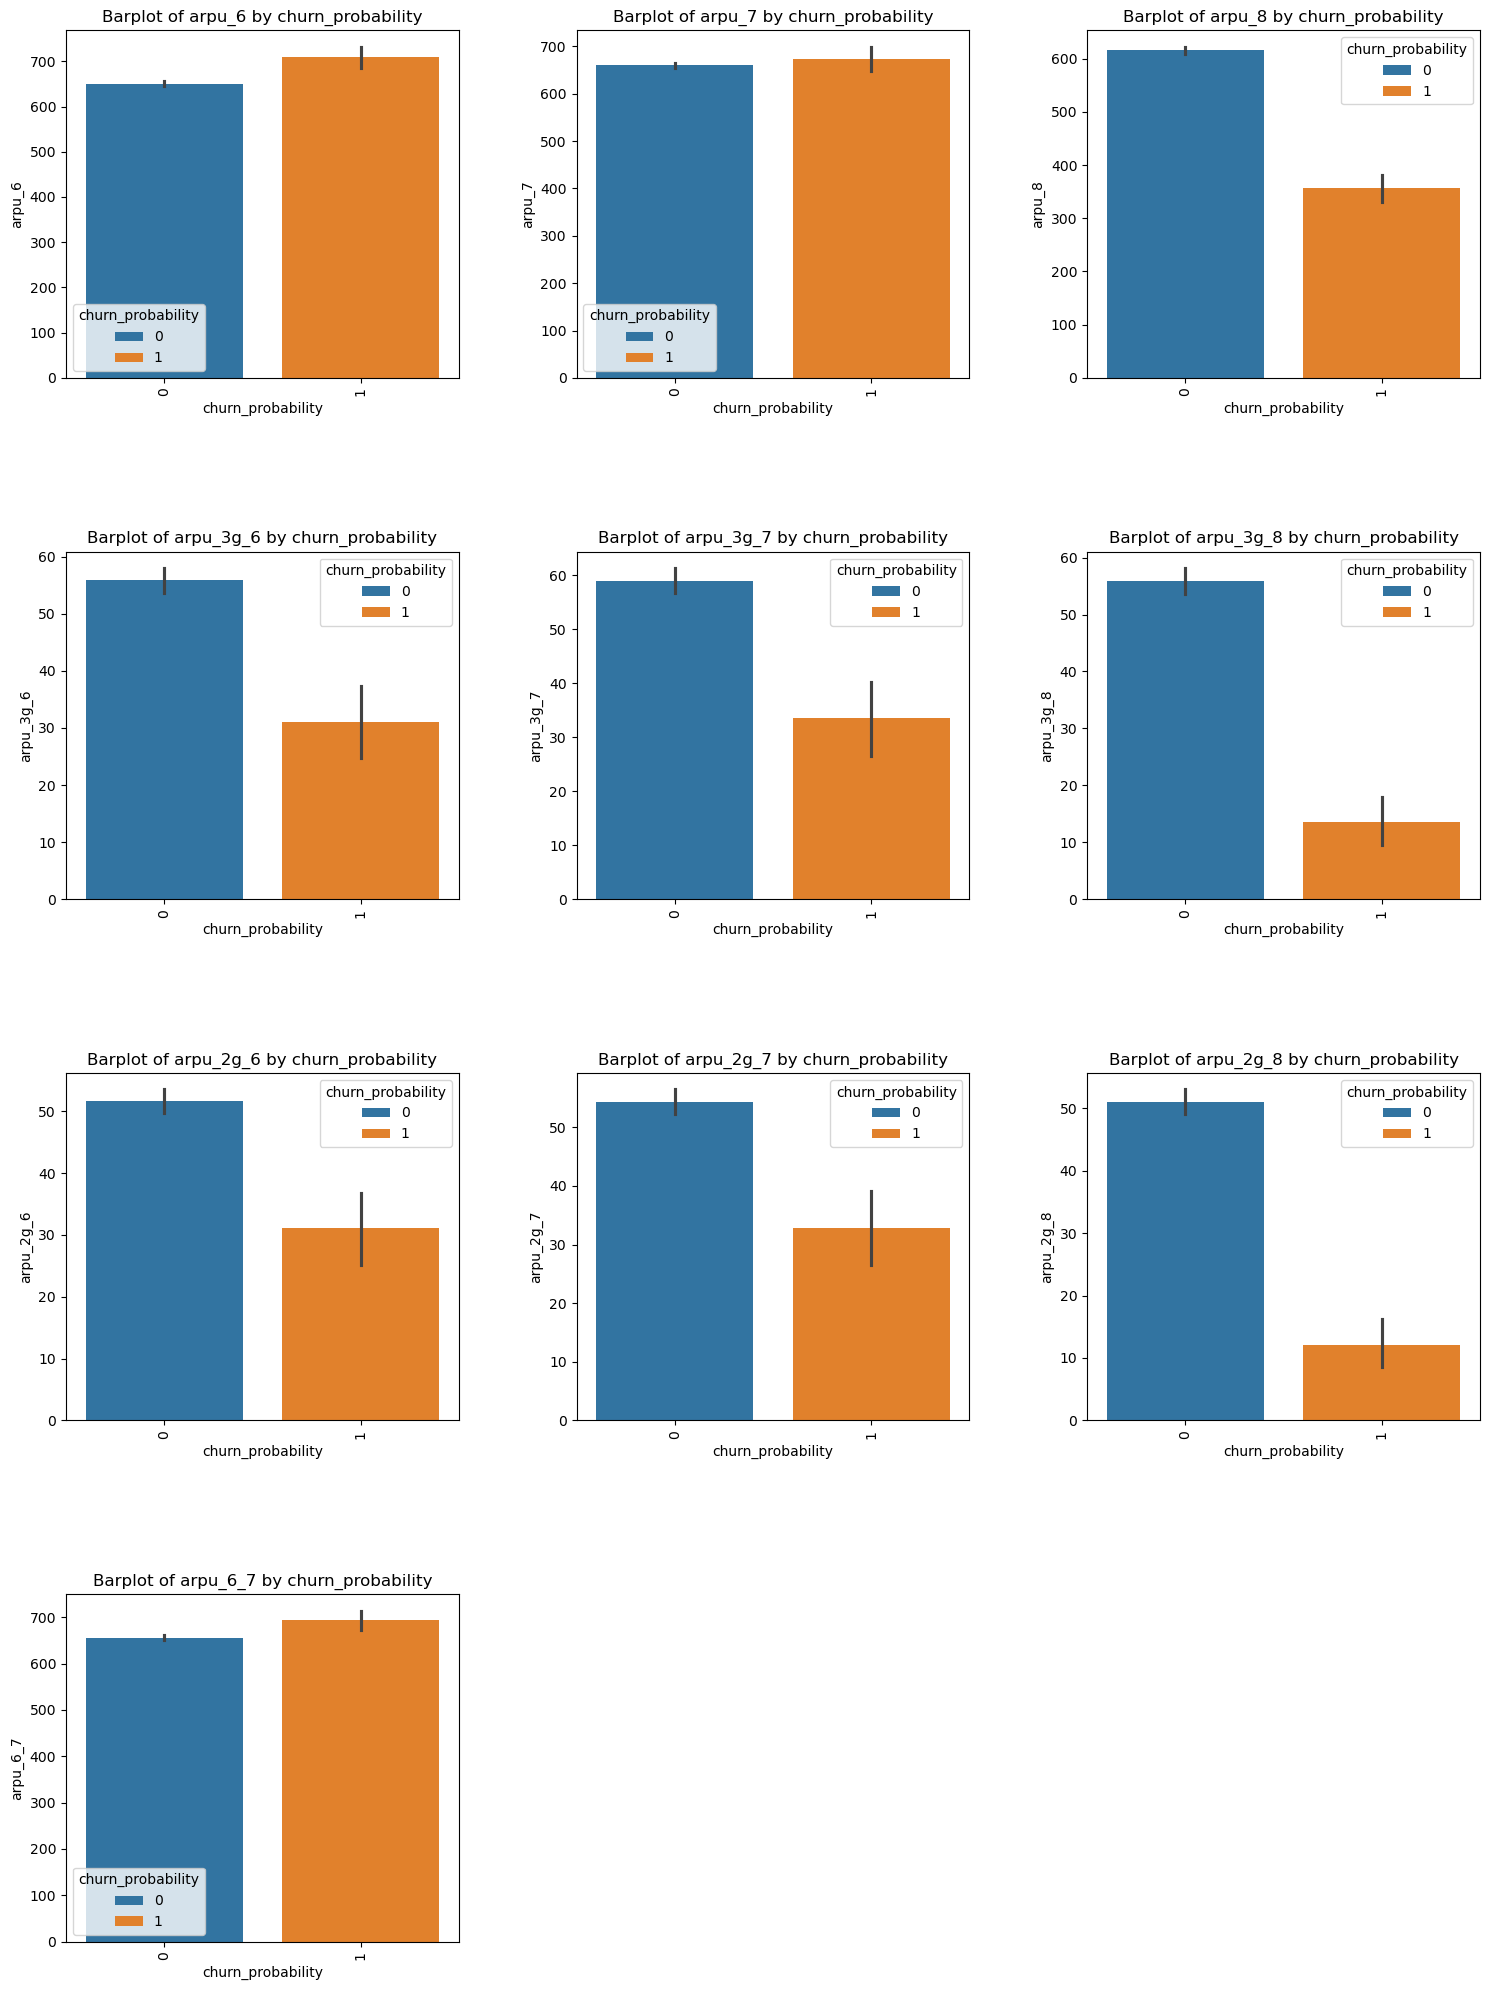

In [917]:
arpu_col = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('arpu')].to_list()
visualise_target_var('barplot', high_value_customers_train, arpu_col, hue='churn_probability')

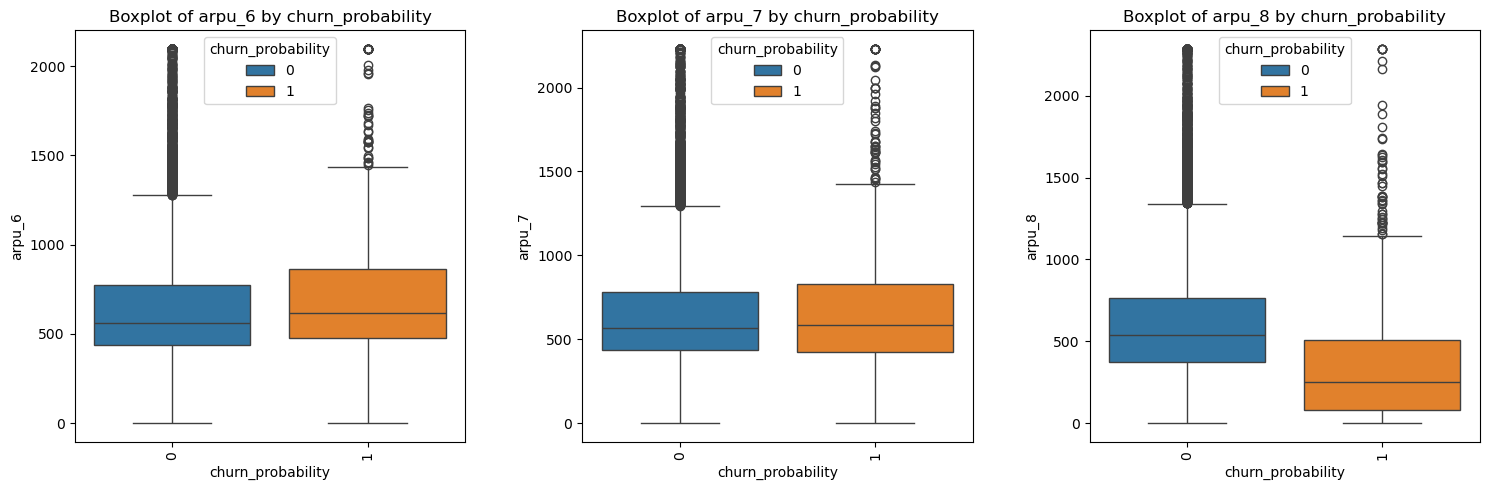

In [918]:
# boxplot
visualise_target_var('boxplot', high_value_customers_train, ['arpu_6','arpu_7','arpu_8'], hue='churn_probability')

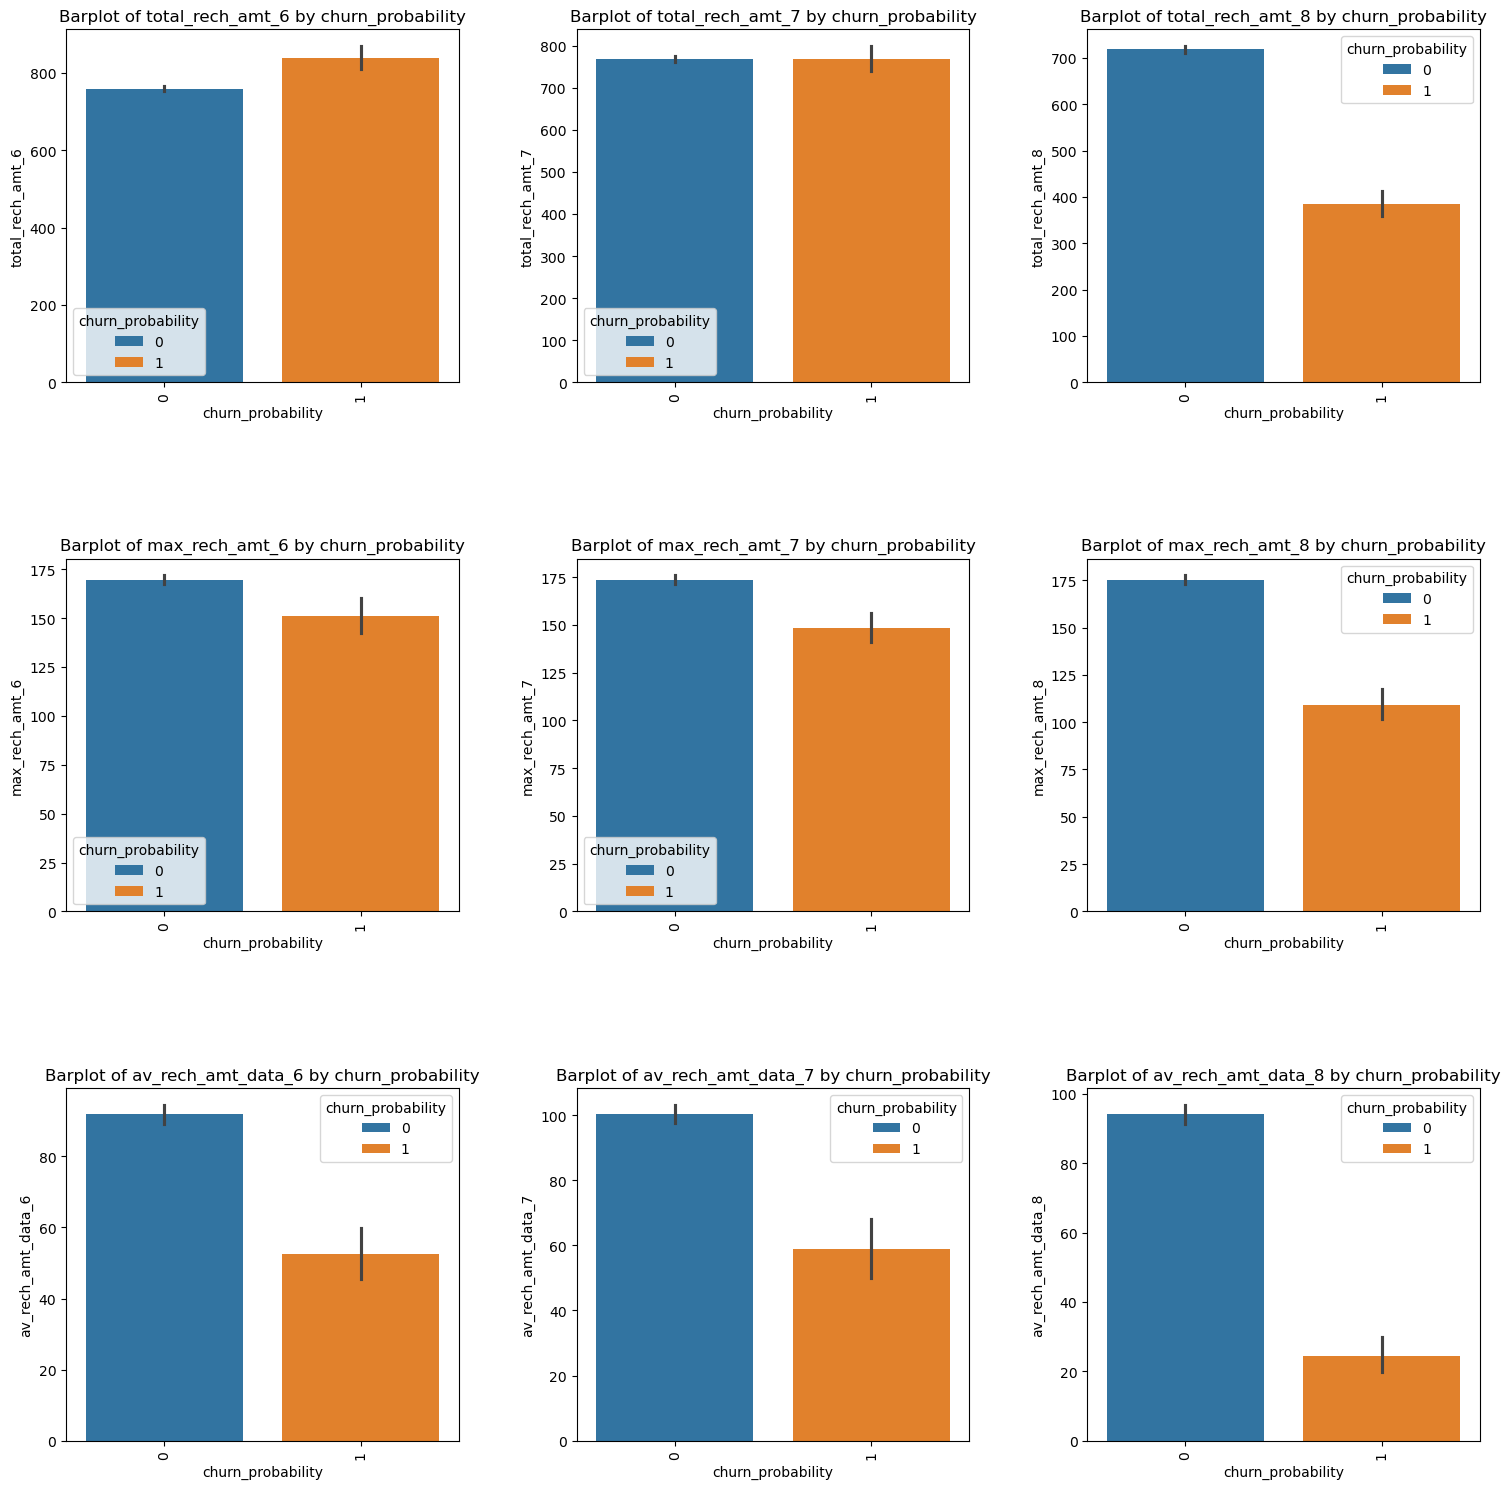

In [919]:
rech_amt = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('rech_amt')].to_list()
visualise_target_var('barplot', high_value_customers_train, rech_amt, hue='churn_probability')

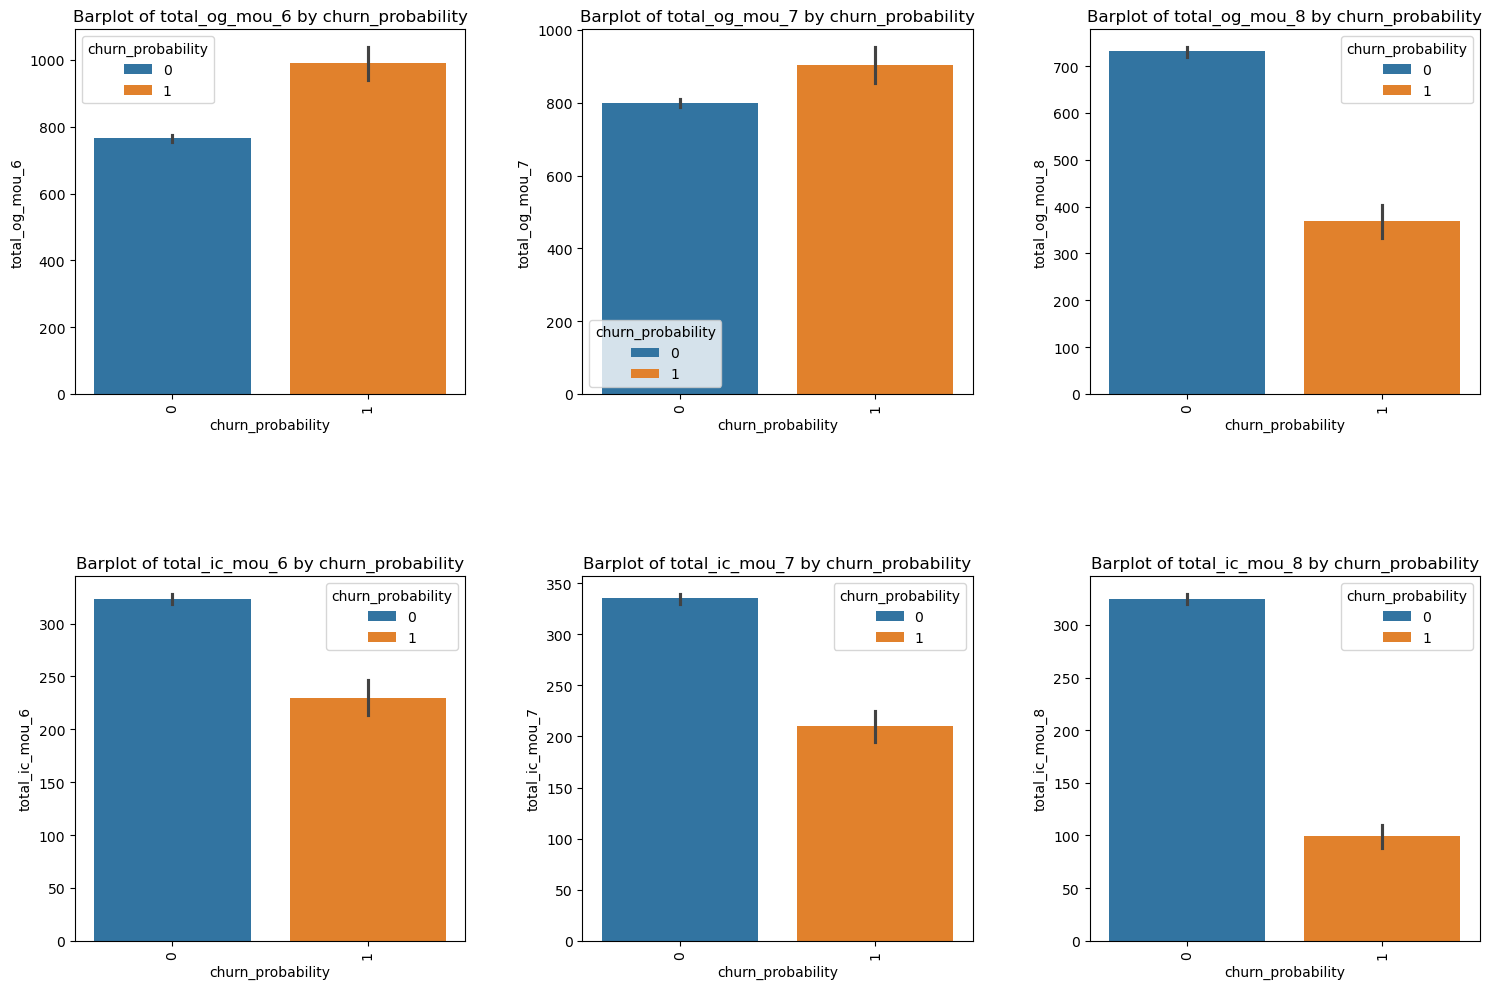

In [920]:
mou = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('total_og_mou|total_ic_mou')].to_list()
visualise_target_var('barplot', high_value_customers_train, mou, hue='churn_probability')

**So we can clearly see that in churn phase there is a decline in average revenue,minutes of usage etc**

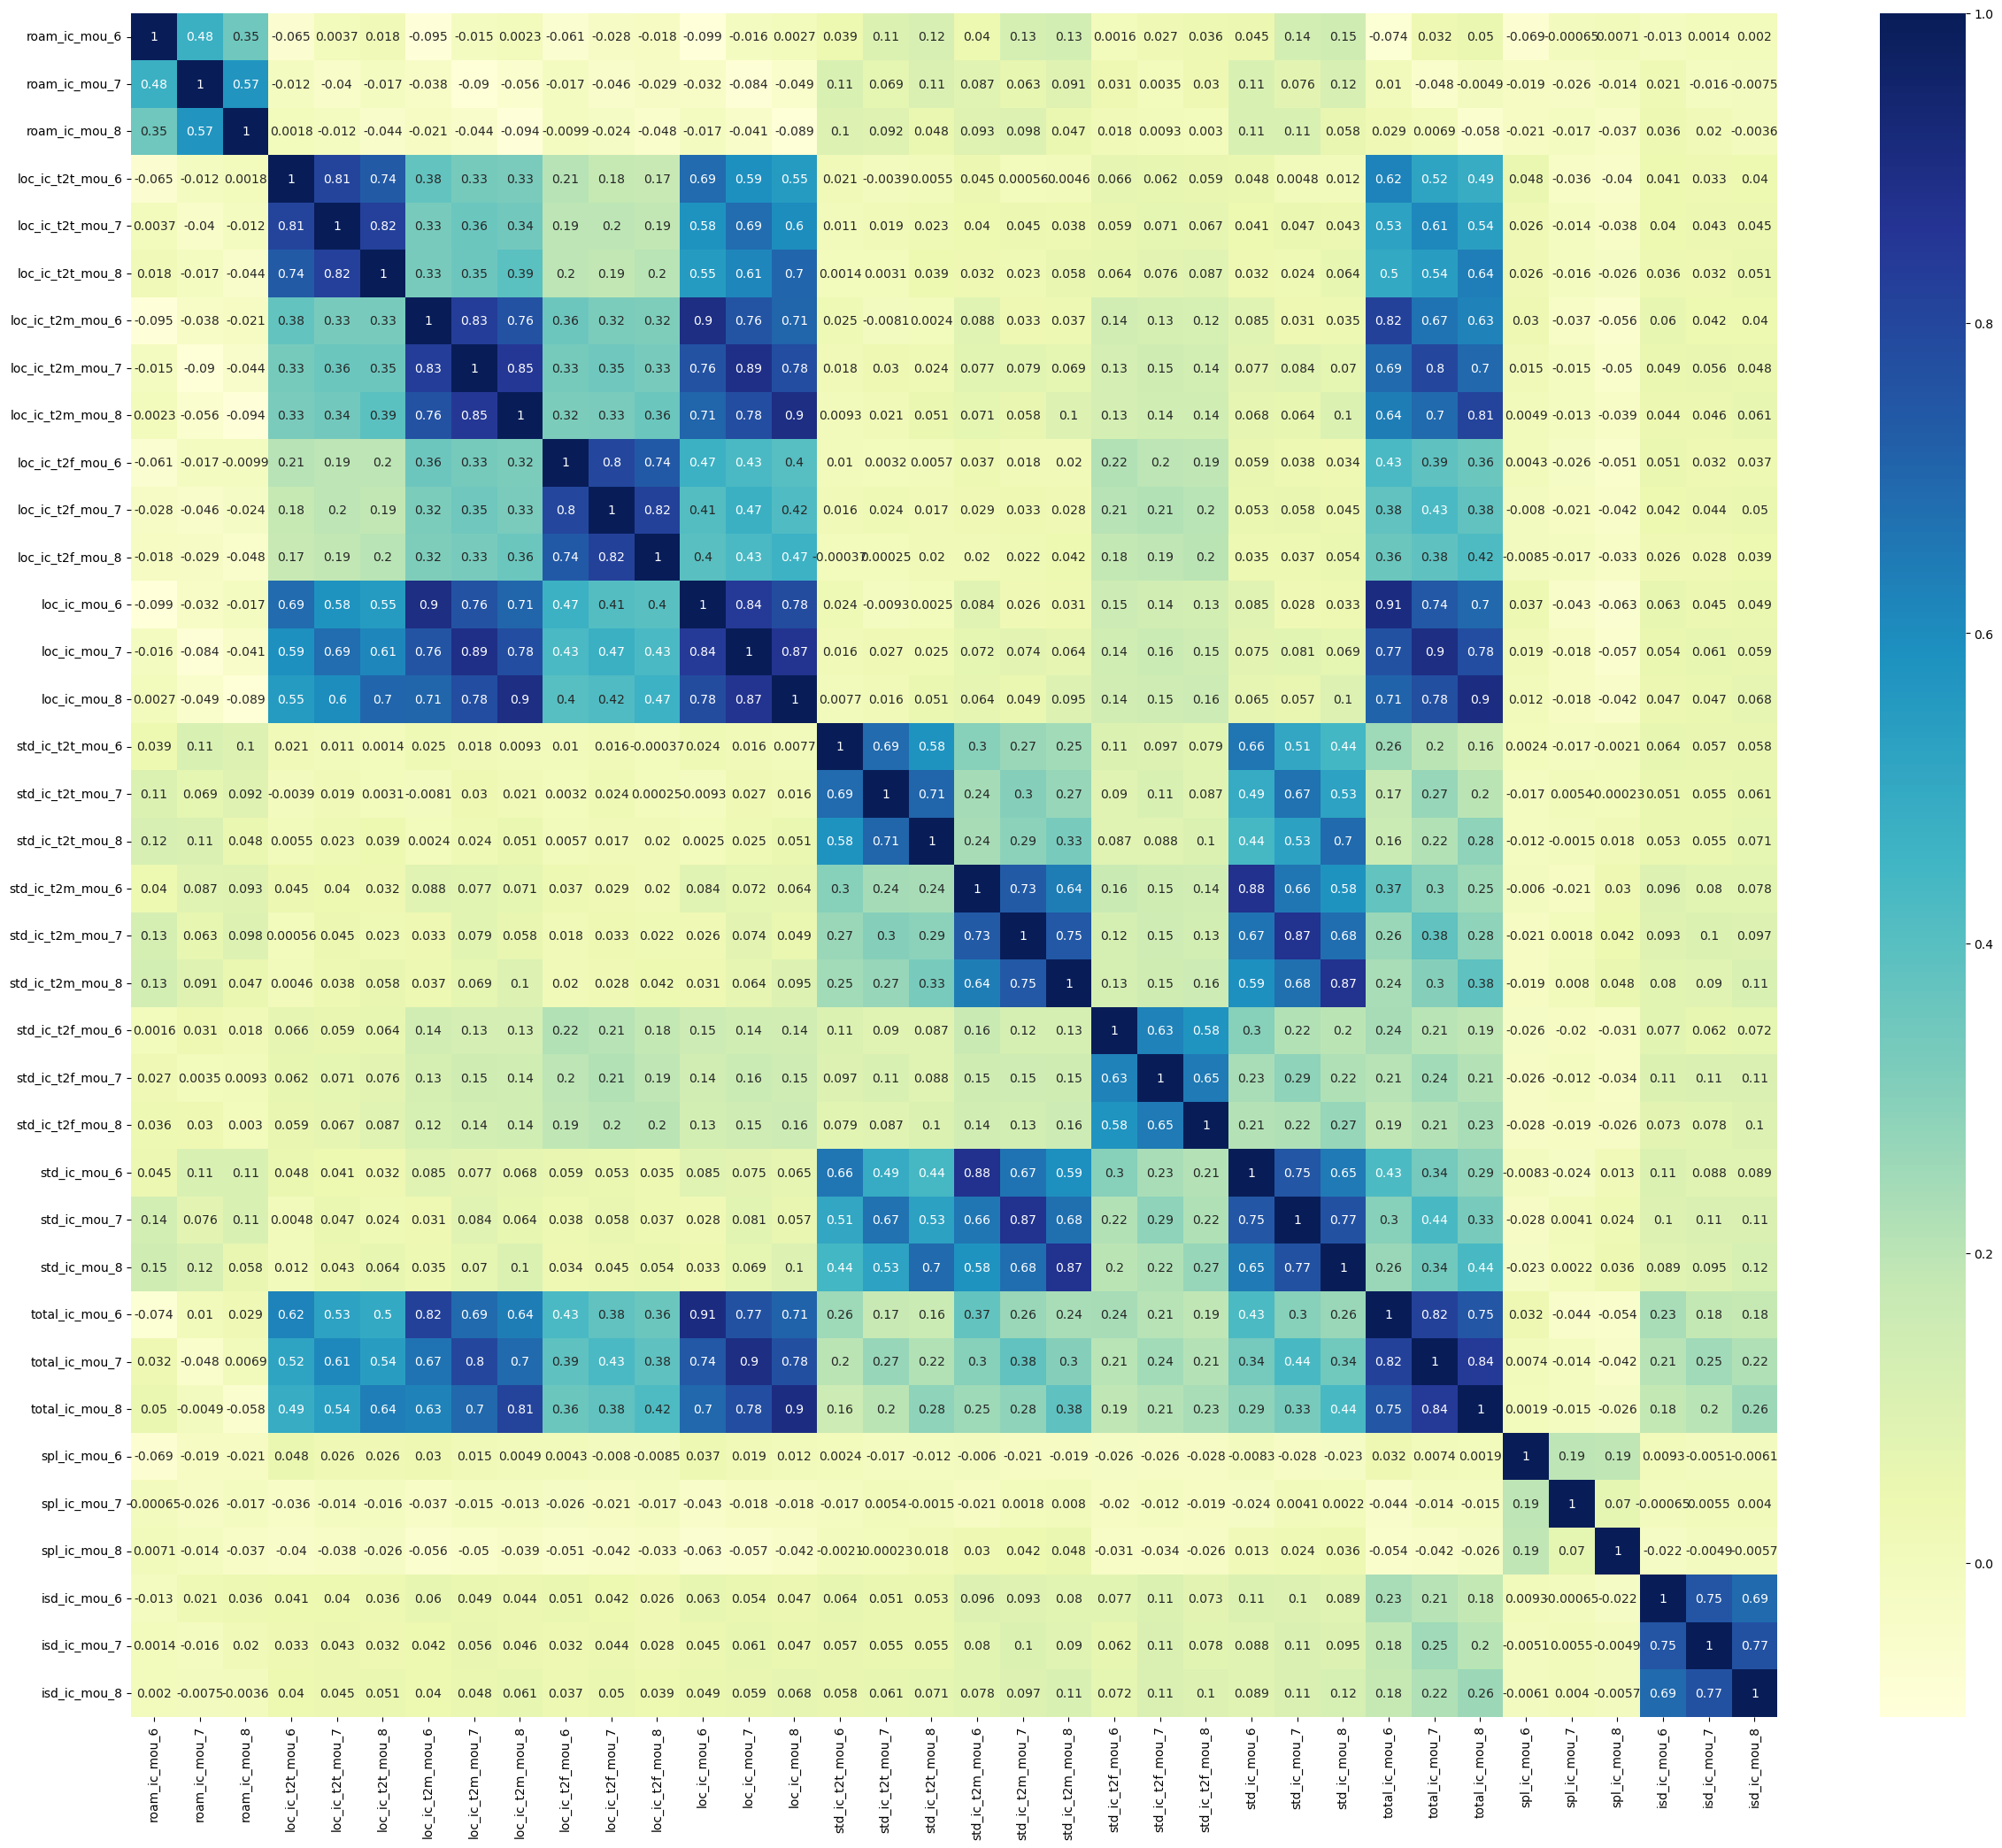

In [921]:
# heatmap for float ic minutes
plt.figure(figsize=(30,25))
sns.heatmap(ic_mou_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

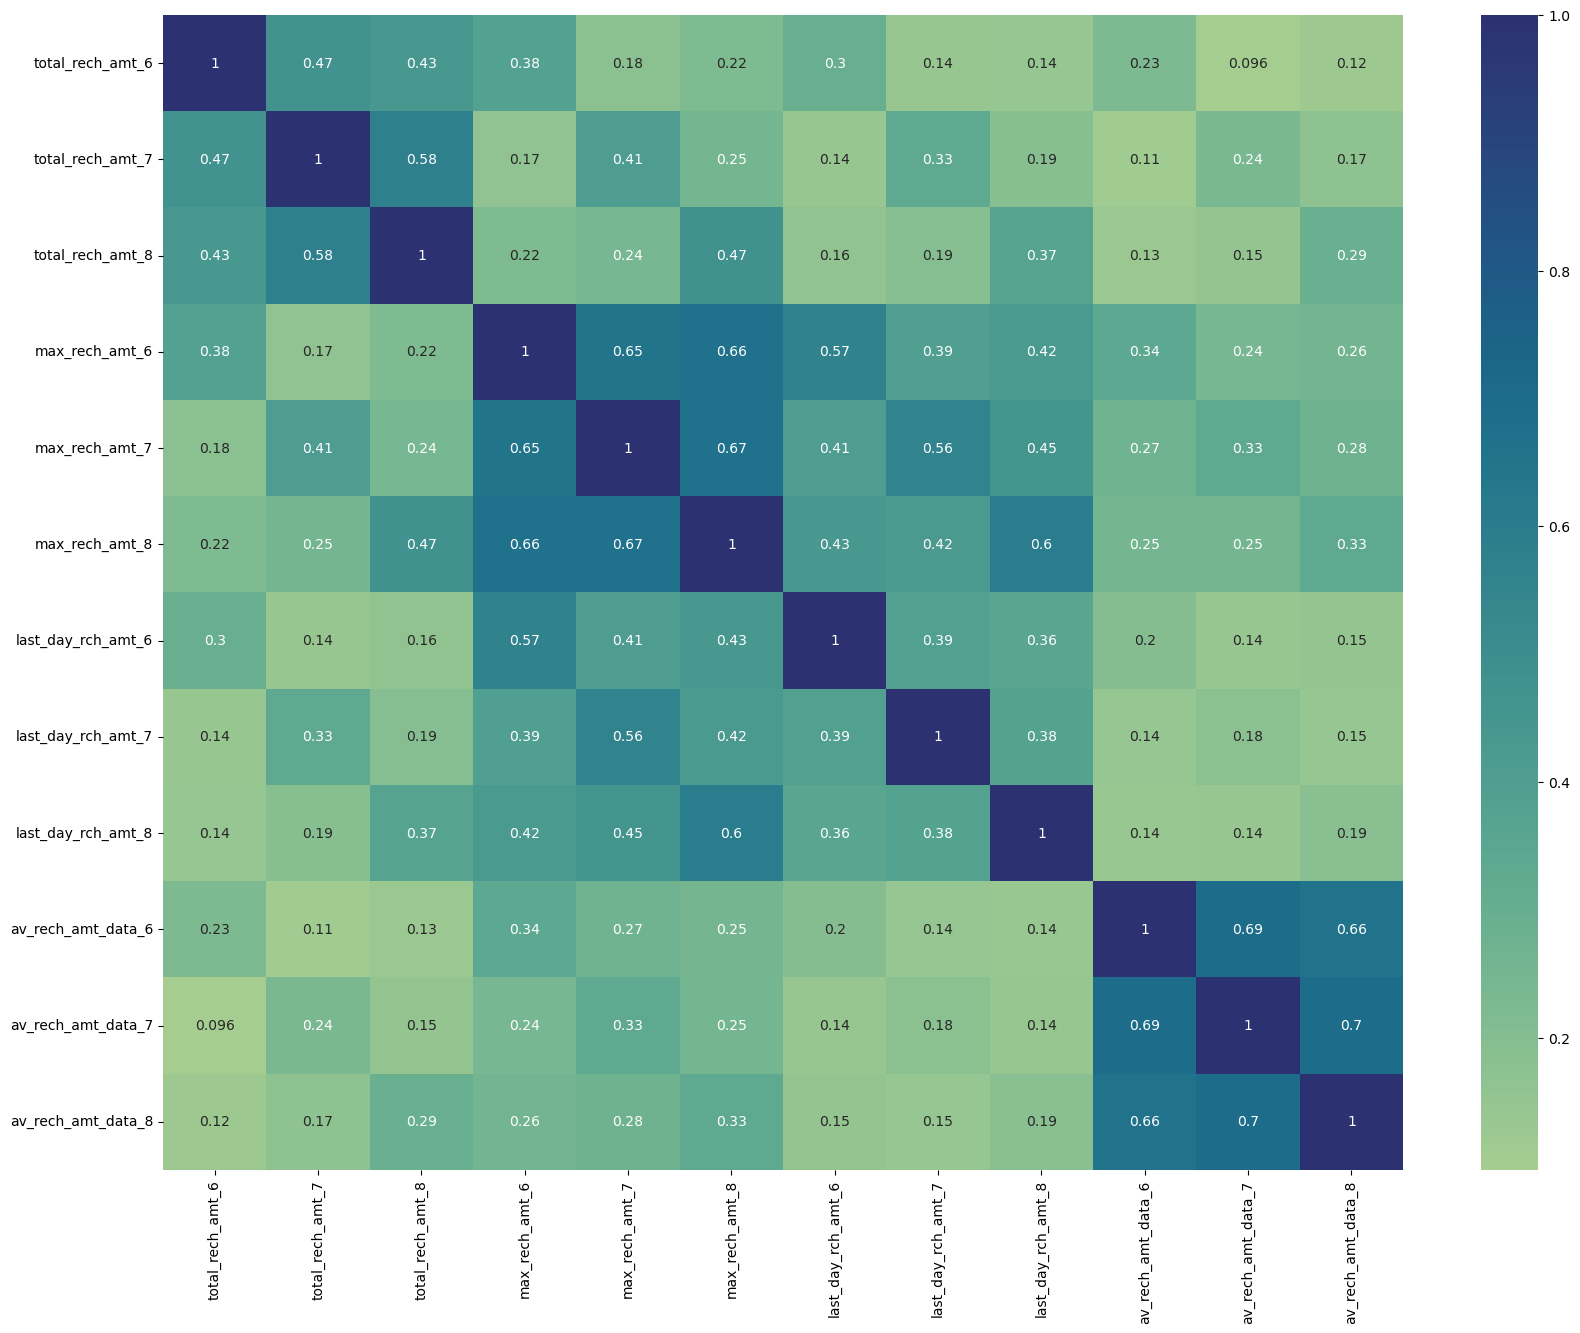

In [922]:
# heatmap for float amount data
plt.figure(figsize=(20,15))
sns.heatmap(amount_data.corr(),annot=True,cmap='crest')
plt.show()

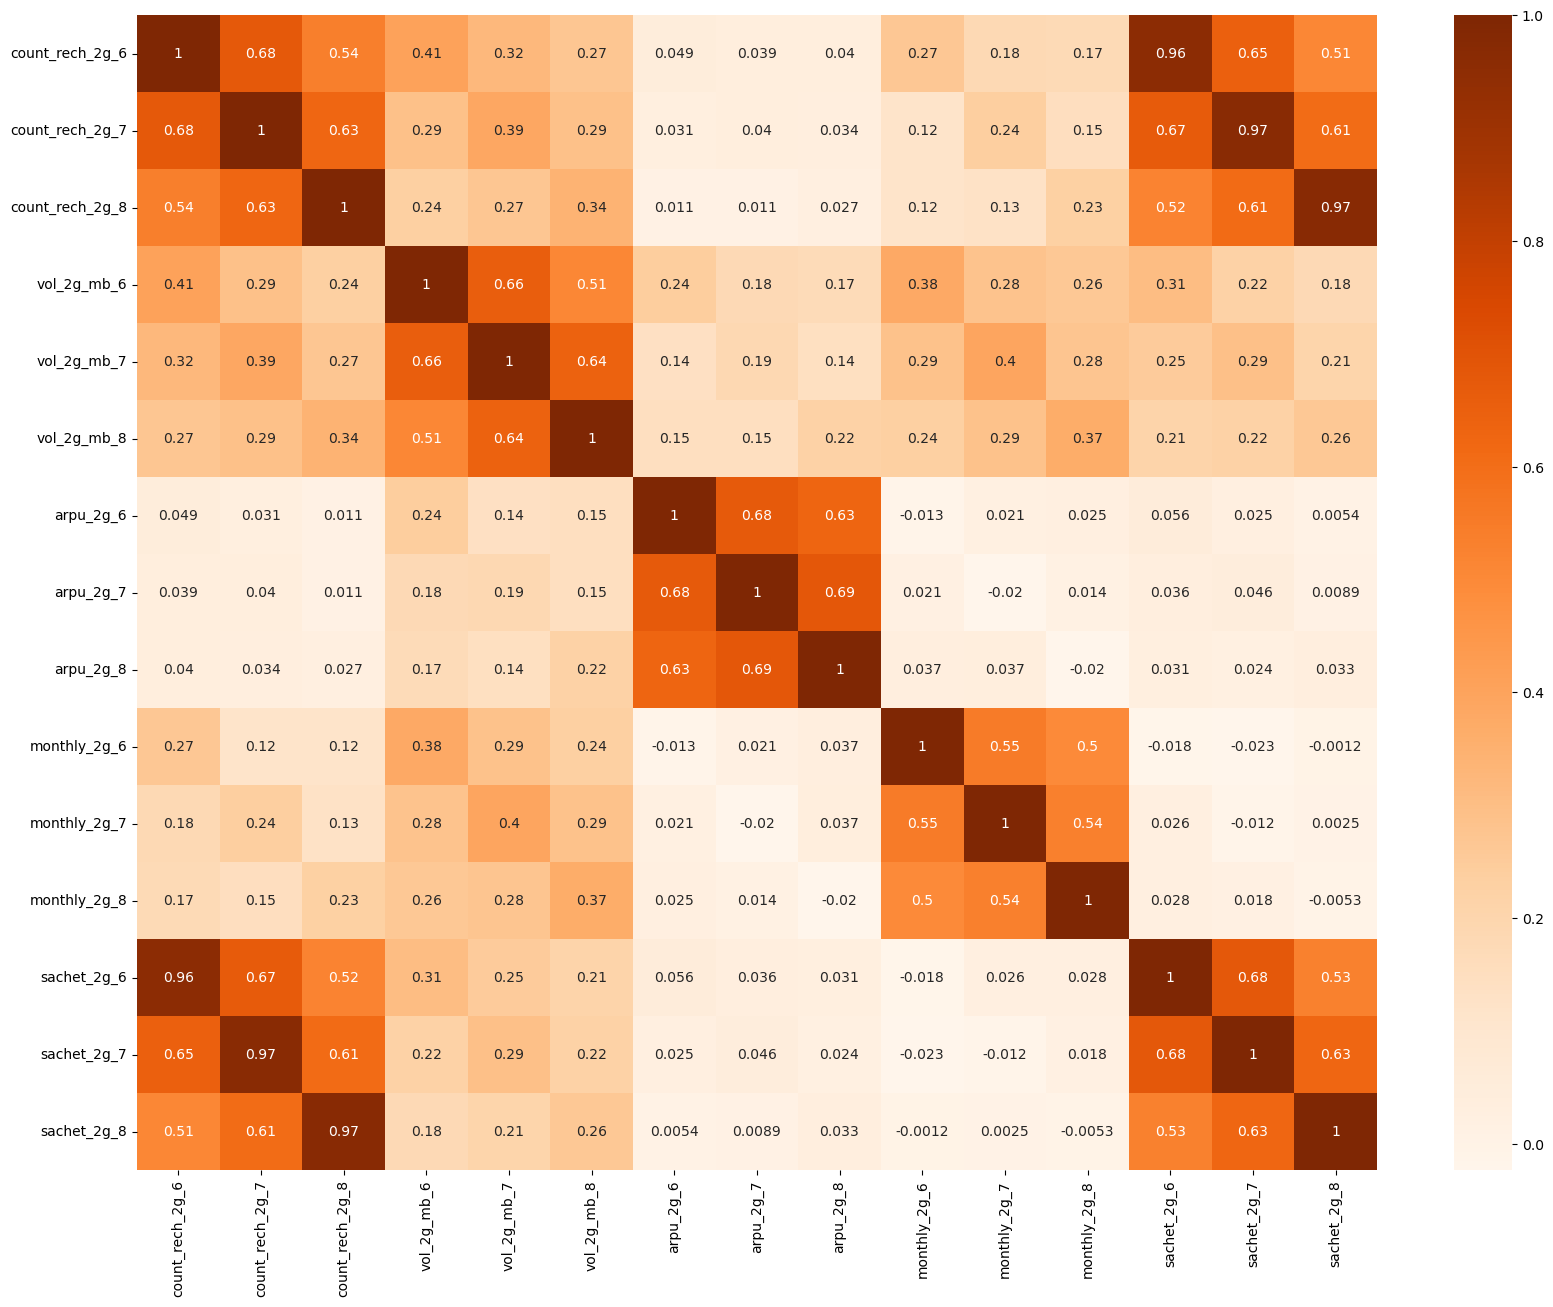

In [923]:
# heatmap for float 2g data
plt.figure(figsize=(20,15))
sns.heatmap(data2g.corr(),annot=True,cmap='Oranges')
plt.show()

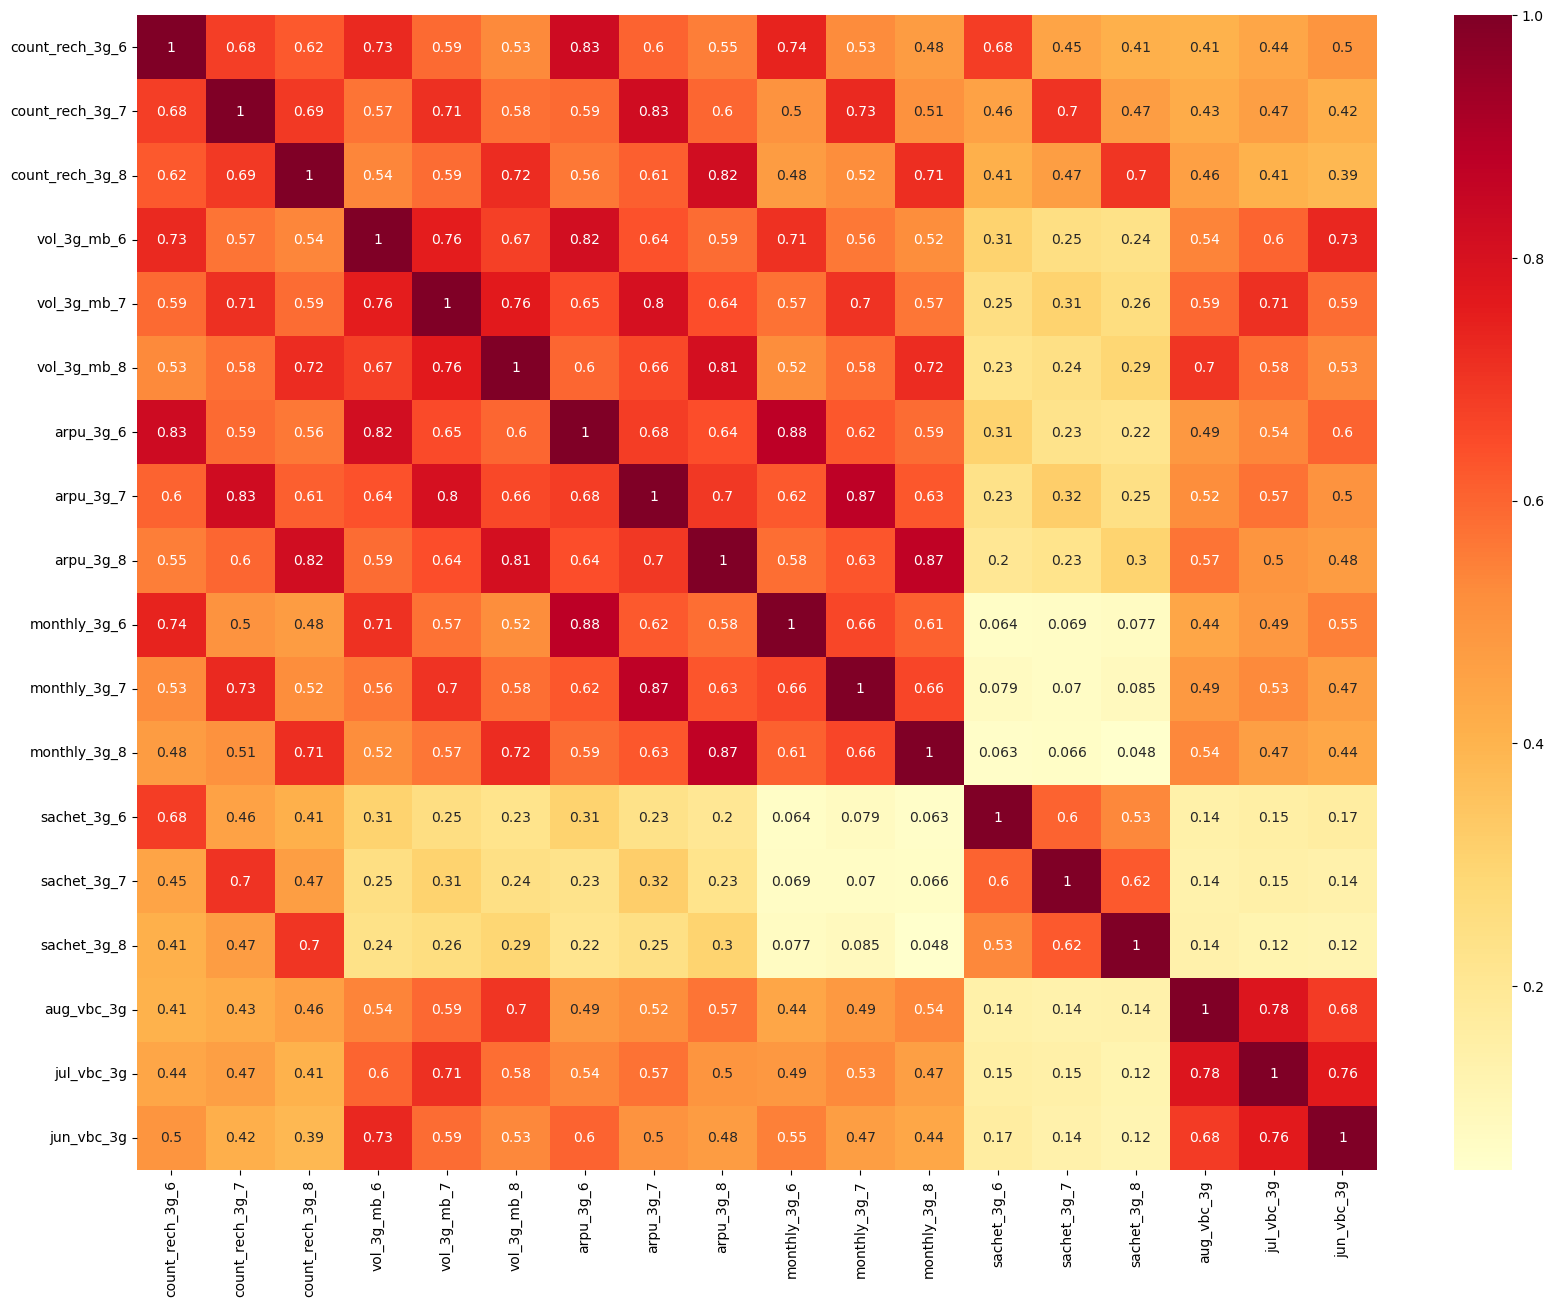

In [924]:
# heatmap for float 3g data
plt.figure(figsize=(20,15))
sns.heatmap(data3g.corr(),annot=True,cmap='YlOrRd')
plt.show()

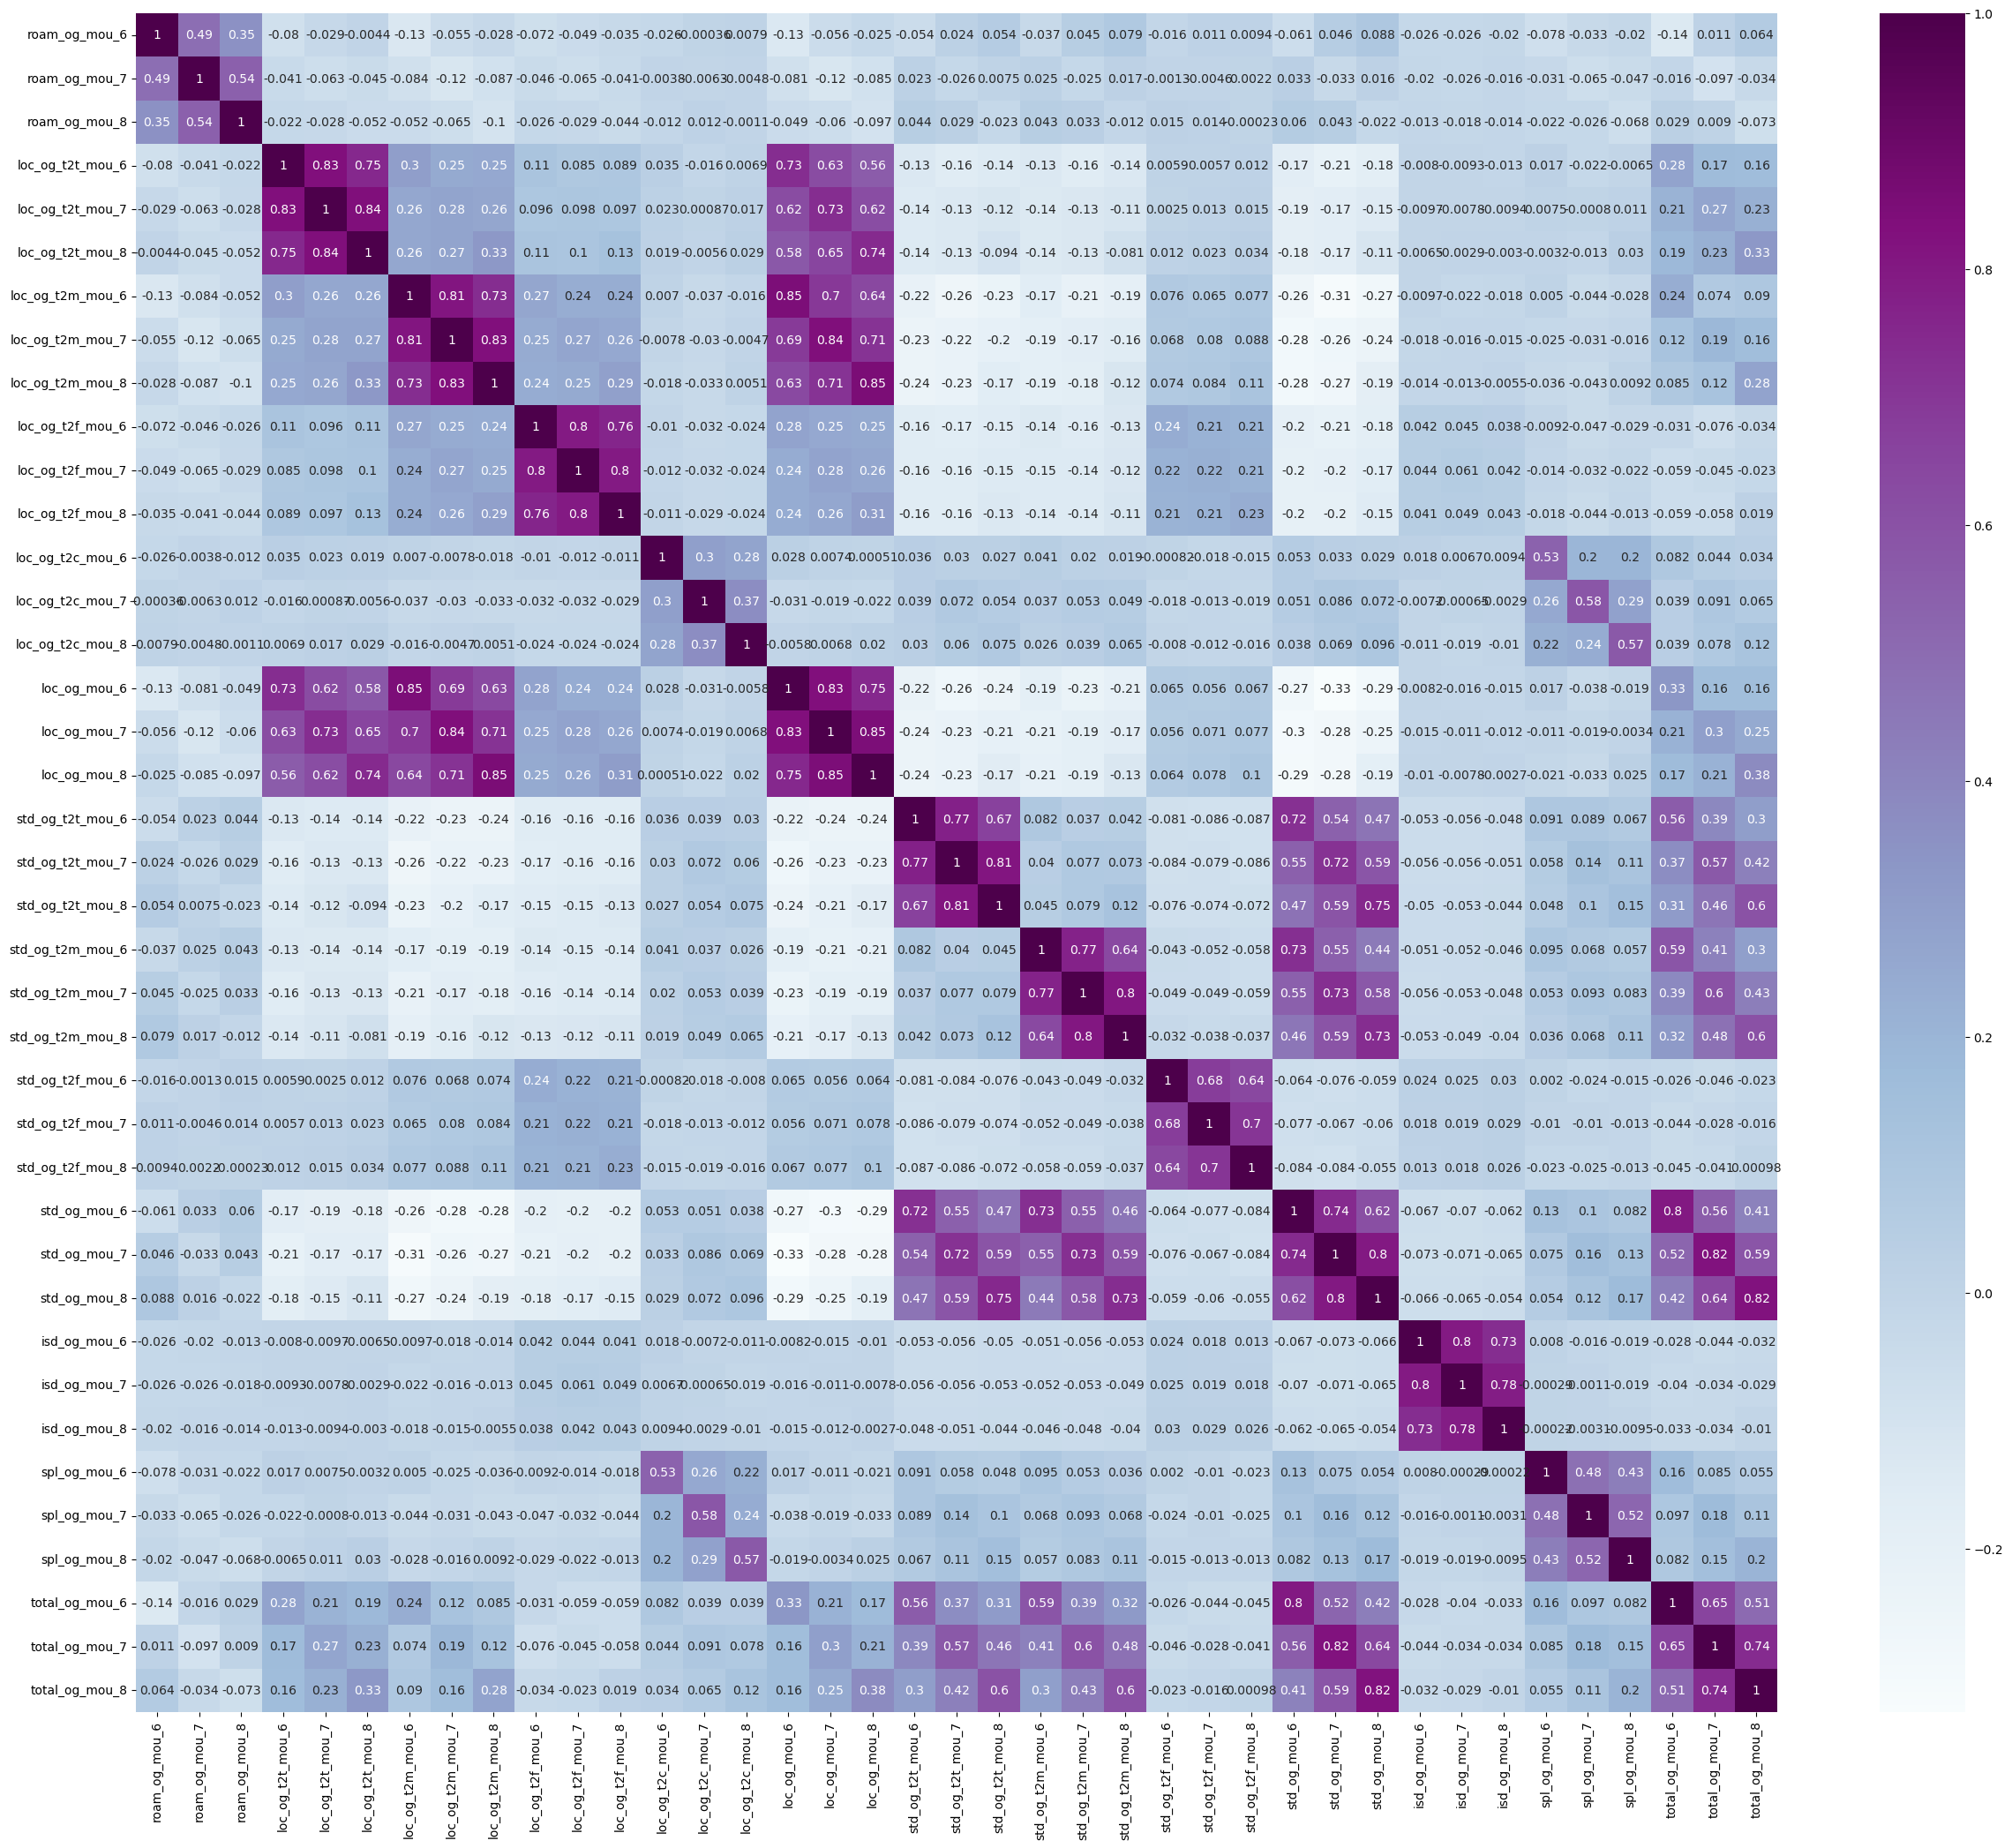

In [925]:
# heatmap for float og min data
plt.figure(figsize=(30,25))
sns.heatmap(og_mou_data.corr(),annot=True,cmap='BuPu')
plt.show()

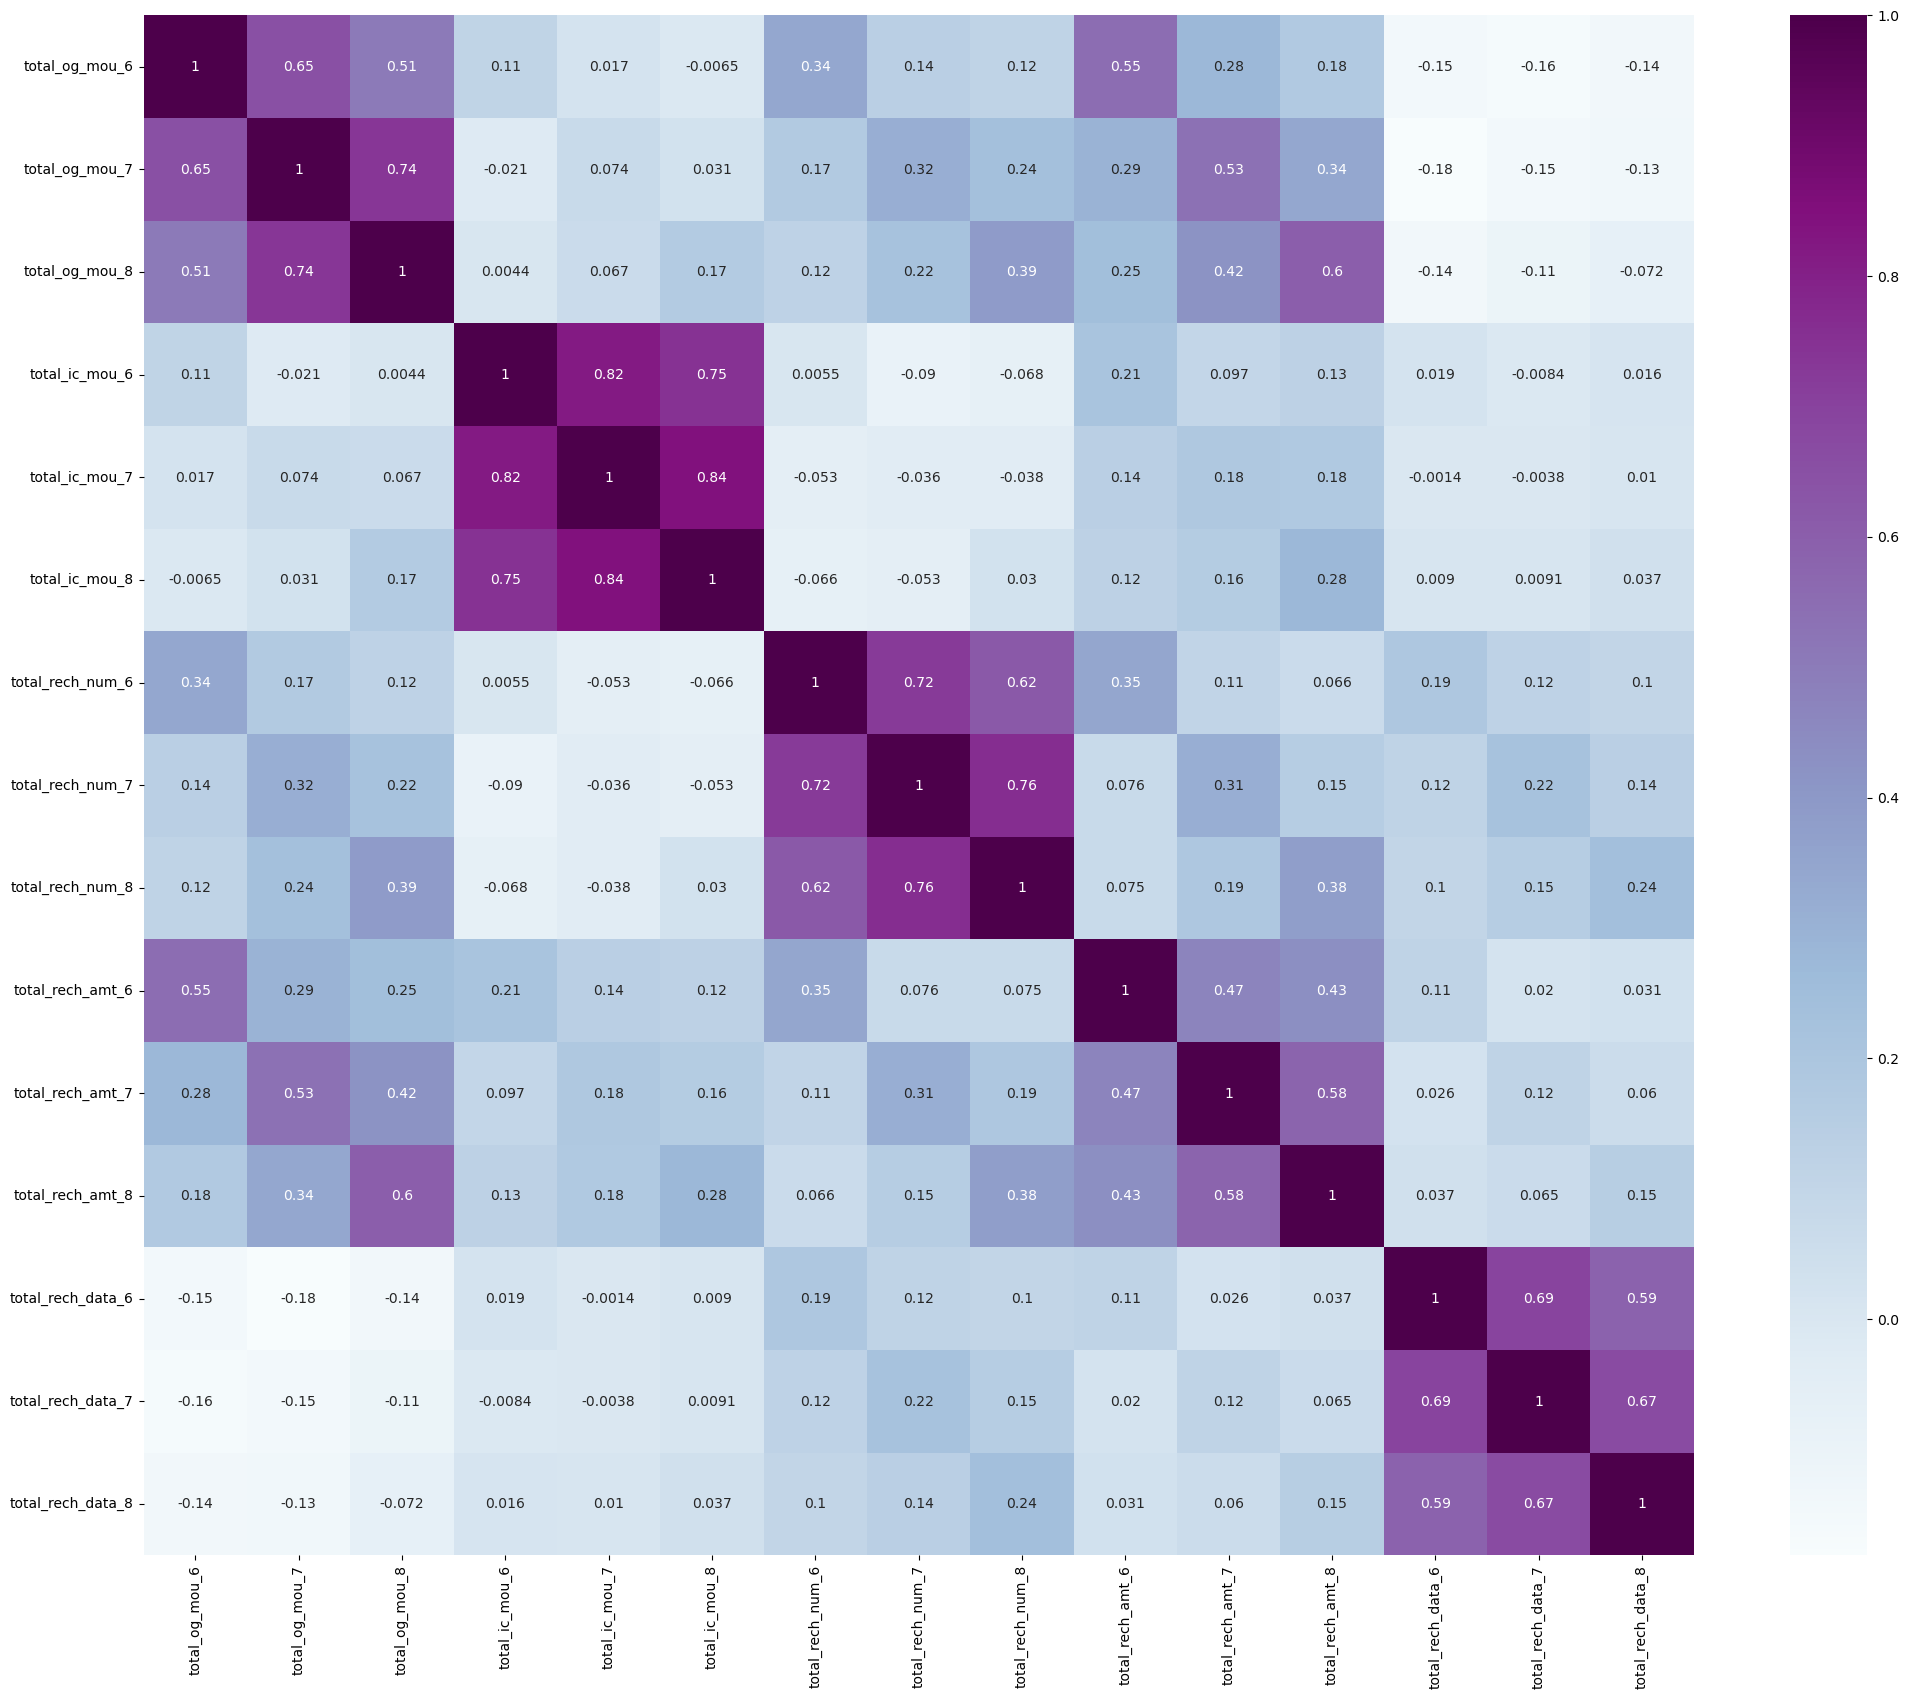

In [926]:
# heatmap for float total data
plt.figure(figsize=(25,20))
sns.heatmap(total_data.corr(),annot=True,cmap='BuPu')
plt.show()

# 5 Feature Engineering

In [927]:
high_value_customers_train['std_arpu'] = high_value_customers_train[['arpu_6', 'arpu_7']].std(axis=1)
high_value_customers_train['arpu_change_7_6'] = high_value_customers_train['arpu_7'] - high_value_customers_train['arpu_6']

# Interaction Features
high_value_customers_train['total_mou'] = high_value_customers_train[['total_og_mou_6', 'total_og_mou_7']].sum(axis=1)

# Ratio Features
high_value_customers_train['total_rech_amt'] = high_value_customers_train[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].sum(axis=1)

# Calculate the ratio of total outgoing amount to age on network
high_value_customers_train['avg_daily_usage'] = high_value_customers_train['total_rech_amt'] / high_value_customers_train['aon']

high_value_customers_train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

# 6 Model:1 PCA+Logistic Regression

In [928]:
high_value_customers_train.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_m

In [929]:
y_train = high_value_customers_train['churn_probability'].astype('int64')
X_train = high_value_customers_train.drop('churn_probability',axis=1)

In [930]:
# handle class imbalence using smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [931]:

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_resampled)
features_scaled

array([[-1.74411472, -0.68103851, -0.73579555, ..., -0.04204026,
        -0.74600296,  0.21992066],
       [-1.74396525, -0.25351405, -0.79669696, ..., -0.84213157,
        -0.34830954, -0.16869196],
       [-1.74356665,  1.41973519,  0.76096607, ...,  0.22777681,
         0.83685643,  0.96554149],
       ...,
       [ 1.5048167 , -1.45202612,  1.25564441, ..., -1.15979207,
         0.00801141, -0.69939903],
       [-1.71272552, -0.84652778, -0.31661819, ..., -0.19011155,
        -0.79369913,  0.64310371],
       [-1.6185081 ,  0.46599106,  0.37030607, ..., -0.72105971,
         0.72759964,  3.80330678]])

In [932]:
# Retains components explaining 90% variance
pca = PCA(n_components=0.90,random_state=42)
features_pca = pca.fit_transform(features_scaled)

# Check the number of components chosen
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 55


In [933]:
features_pca.shape

(28162, 55)

#### Scree plot

In [934]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

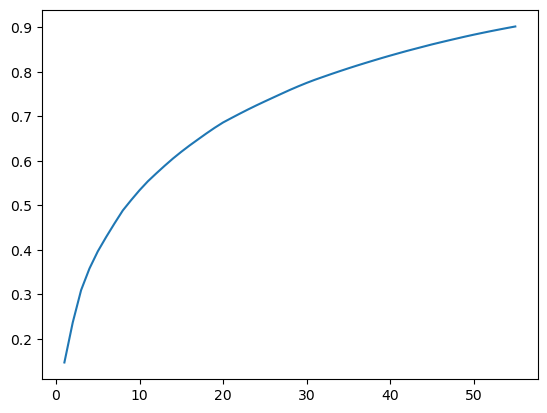

In [935]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

In [936]:
pca_train = pd.DataFrame(features_pca,columns= [f"pc_{i}" for i in range(1,features_pca.shape[1]+1)])
pca_train.head()

pc_1      pc_2      pc_3      pc_4      pc_5      pc_6      pc_7  \
0 -4.189223 -1.574414  0.250541 -0.358940 -0.597677 -1.209996 -1.315305   
1  3.720871  1.281619 -4.950688  0.927915 -0.933857  0.317690 -1.585579   
2  0.496098  5.074839 -2.446920  0.335714 -2.031881 -1.237084  2.841010   
3  4.528525 -2.598720  3.303161  2.070397  7.022246  5.197831 -2.568199   
4  7.165232  1.320831  7.358491  2.444237  0.075555  0.541499  1.588875   

       pc_8      pc_9     pc_10     pc_11     pc_12     pc_13     pc_14  \
0 -2.451282  0.167982  0.082878  0.194453 -0.823758 -1.014765 -0.397883   
1 -0.394018  2.243386 -2.131716  2.369637  1.572439 -1.412113 -1.095204   
2  1.702472 -1.156553 -0.505416 -0.009268 -1.484563 -0.159071  1.423570   
3 -1.284320  4.499747 -4.929858  5.719726  2.128247 -2.178143 -0.133046   
4  2.653713 -6.037684  1.888359 -3.729966  1.546546  1.519720 -0.962211   

      pc_15     pc_16     pc_17     pc_18     pc_19     pc_20     pc_21  \
0  0.667887  0.249979  0.449638 -0.501882 -0.406148  0.393647  0.095014   
1  0.424519 -0.091637  2.932029  0.260639 -0.118753 -1.776508 -0.923710   
2 -0.205915 -1.505394  0.245776 -0.044096 -0.743080  3.485298  0.287345   
3 -1.314363 -2.551639  3.741305  0.944823  0.858533  2.575229  0.238160   
4  1.149638  0.713020  4.728715  0.569753  1.267159 -0.524467  3.961636   

      pc_22     pc_23     pc_24     pc_25     pc_26     pc_27     pc_28  \
0 -0.337821 -0.175144  0.114493  0.061581 -0.204426  0.281945 -0.375065   
1  1.979001 -0.659121  0.526079  0.997735  1.006777  0.311688  0.257840   
2  0.635940 -0.056256 -1.333834 -0.032705 -0.446705 -0.737921  0.852108   
3  2.171763 -2.301376  2.219770  2.939473 -1.465157 -0.301120 -5.022664   
4 -1.284075 -4.082576  0.893675  1.399034 -0.236949 -0.631023  3.610036   

      pc_29     pc_30     pc_31     pc_32     pc_33     pc_34     pc_35  \
0  0.399344 -0.441282 -0.132343 -0.973204  0.600542 -1.408769  0.233824   
1 -0.681783 -0.436877  0.675598 -0.840959  1.162569 -1.396490  0.166874   
2  0.320724 -0.578059 -1.181781 -0.002079 -0.292318 -1.890395  0.547769   
3 -0.415071 -0.161361 -0.141063 -0.271380  0.357536 -1.232842  0.491769   
4 -2.193517  0.571800 -0.990322  1.037525  1.732761 -1.186944 -0.034765   

      pc_36     pc_37     pc_38     pc_39     pc_40     pc_41     pc_42  \
0  0.123875 -0.417320  0.083286 -0.556978  0.036397  0.265409 -0.269795   
1  0.106333 -1.061204  0.072798  1.129708 -0.636187  0.300354 -1.463028   
2 -0.149863 -0.202999  0.915443 -0.895785  0.192482  0.377132  0.223936   
3 -1.259682  0.908408  0.081712 -0.510384  0.417840 -1.201835  0.664318   
4  0.357557  0.730423 -0.407319  1.520925  0.278406 -2.840886  2.151920   

      pc_43     pc_44     pc_45     pc_46     pc_47     pc_48     pc_49  \
0 -0.220774  0.263610  0.518116 -0.201091 -0.001188  0.792952 -0.376741   
1  0.633038 -2.017276 -1.112736  1.090691 -1.195371 -0.105158 -1.239457   
2 -1.246732  0.701799 -0.263377 -1.144467  0.402224  0.888254 -0.809902   
3  1.232076  0.823604 -0.169617 -0.649571  0.377633  0.356866 -0.723043   
4 -0.924751  0.471355 -1.297852 -0.792249 -1.011678 -0.054370 -0.187747   

      pc_50     pc_51     pc_52     pc_53     pc_54     pc_55  
0  0.548279  0.365333 -0.366798  0.129410 -0.041726 -0.240778  
1  0.559252 -1.641927  0.291851 -2.181611  1.214846  0.508559  
2 -0.388447 -0.612224  0.475556 -0.162793  0.161788 -0.299853  
3  1.166330  0.270284  0.149785 -0.241376  0.401252 -0.207032  
4  2.124793 -0.752082  2.155635  0.079109  1.234540  0.076386

In [937]:
pca_train = pd.concat([pca_train,y_resampled],axis=1)
pca_train.shape

(28162, 56)

In [938]:
pca_train.columns

Index(['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9',
       'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17',
       'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25',
       'pc_26', 'pc_27', 'pc_28', 'pc_29', 'pc_30', 'pc_31', 'pc_32', 'pc_33',
       'pc_34', 'pc_35', 'pc_36', 'pc_37', 'pc_38', 'pc_39', 'pc_40', 'pc_41',
       'pc_42', 'pc_43', 'pc_44', 'pc_45', 'pc_46', 'pc_47', 'pc_48', 'pc_49',
       'pc_50', 'pc_51', 'pc_52', 'pc_53', 'pc_54', 'pc_55',
       'churn_probability'],
      dtype='object')

In [939]:
X_train_standerd = pca_train.drop('churn_probability',axis=1)
y_train_standerd = pca_train['churn_probability']

In [940]:
print(X_train_standerd.shape)
print(y_train_standerd.shape)

(28162, 55)
(28162,)


In [941]:
logmodel = LogisticRegression(random_state=42)

In [942]:
y_pred = logmodel.fit(X_train_standerd,y_train_standerd)
y_pred

LogisticRegression(random_state=42)

In [943]:
y_train_pred_proba = logmodel.predict_proba(X_train_standerd)[:, 1]
y_train_pred_proba

array([0.58874257, 0.00179473, 0.70834874, ..., 0.2962346 , 0.85052324,
       0.35649731])

In [944]:
y_train_pred_proba.shape

(28162,)

In [945]:
y_actual = y_train_standerd

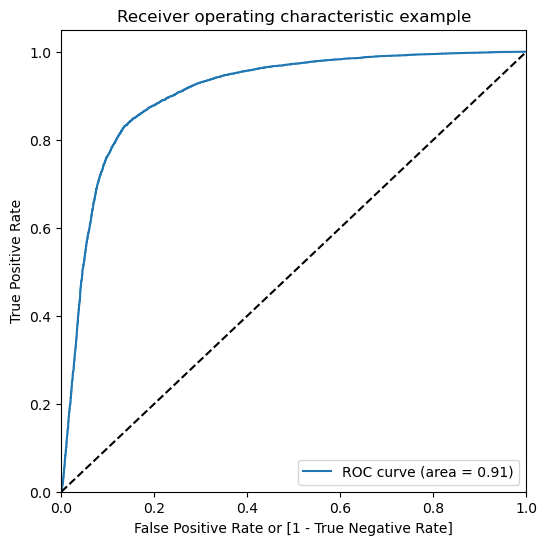

(array([0.        , 0.        , 0.        , ..., 0.99985796, 0.99992898,
        1.        ]),
 array([0.00000000e+00, 7.10176834e-05, 1.42035367e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99886908e+00, 9.98869079e-01, 9.98717929e-01, ...,
        3.67710600e-26, 9.01752198e-27, 7.80681859e-27]))

In [946]:
draw_roc(y_actual,y_train_pred_proba)

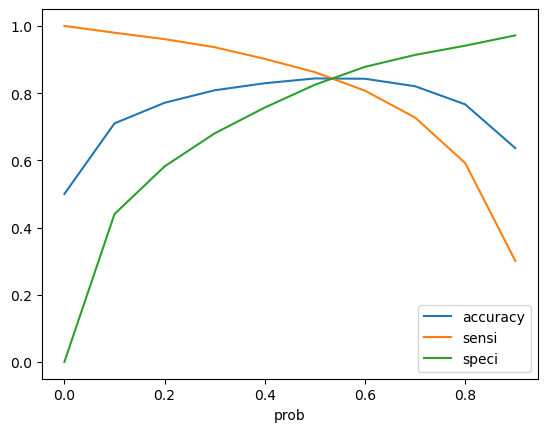

prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.709928  0.979760  0.440097
0.2   0.2  0.771288  0.960656  0.581919
0.3   0.3  0.808465  0.936652  0.680278
0.4   0.4  0.829451  0.901854  0.757049
0.5   0.5  0.843690  0.862439  0.824941
0.6   0.6  0.842731  0.807258  0.878205
0.7   0.7  0.820503  0.727292  0.913714
0.8   0.8  0.766529  0.591861  0.941197
0.9   0.9  0.636283  0.300760  0.971806

In [947]:
optimum_value_calculation(y_actual,y_train_pred_proba)

**so 0.5 is optimum thersold**

In [948]:
y_train_pred = logmodel.predict(X_train_standerd)
y_train_pred.shape

(28162,)

In [949]:
calculate_classification_metrics(y_actual,y_train_pred)

Confusion Matrix

[[11616  2465]
 [ 1937 12144]]


Metric   Value
0             Accuracy  0.8437
1          Sensitivity  0.8624
2          Specificity  0.8249
3            Precision  0.8313
4  False Positive Rate  0.1751
5   True Positive Rate  0.8624

### Finding best params by regularisation

In [ ]:
model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Regularization strength
    'penalty': ['l1', 'l2'],                    # Regularization type               # Solver compatible with L1 and L2 penalties
    'max_iter': [100, 200, 500, 1000]           # Maximum number of iterations
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [ ]:
best_params = grid_search.best_params_
best_params

In [ ]:
logmodel_regular = LogisticRegression(**best_params,random_state=42)

In [ ]:
logmodel_regular.fit(pca_train.drop('churn_probability',axis=1),pca_train['churn_probability'])

In [ ]:
y_pred_regular = logmodel_regular.predict(pca_train.drop('churn_probability',axis=1))

In [ ]:
y_train_pred_proba_regular = logmodel_regular.predict_proba(pca_train.drop('churn_probability',axis=1))[:, 1]
y_train_pred_proba_regular

In [ ]:
draw_roc(y_actual,y_train_pred_proba_regular)

In [ ]:
calculate_classification_metrics(y_actual,y_pred_regular)